In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]
)


In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms
)
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 62.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.1MB/s]


In [ ]:
trainloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=2
)
testloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    num_workers=2
)

In [ ]:
# CNN 모델 생성
class CNNAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        #Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1),                 # (1,28,28) --> (16,28,28)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),# (16,28,28) --> (16,14,14)
            nn.Conv2d(16, 32, 3,1,1),             # (16,14,14) --> (32,14,14)
            nn.ReLU(True),
            nn.MaxPool2d(2,2)                     # (32,14,14) --> (32,7,7)
        )
        #Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32,16, kernel_size=2, stride=2),  # (32,7,7) --> (16,14,14)
            nn.ReLU(True),
            nn.ConvTranspose2d(16,1, kernel_size=2, stride=2),   # (16,14,14) --> (1,28,28)
            nn.Sigmoid()
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded, encoded


![1300747](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAABU4AAAD4CAYAAAAzbnw3AAAKqGlDQ1BJQ0MgUHJvZmlsZQAASImVlwdUU9kWhs+96Y0WQDqhN+ktgJTQQ+9NVEISIJQQAkHErogjMKKoiKAyIENVcFSKjKJiwcKgqNh1ggwq6jhYEBXLu8AiOPPWe2+9vda5+1t/9tlnn5N71toXAIoSSyBIh2UAyODnCMN83GkxsXE03BggARkgC5SAPYudLWCEhAQAxOb83+39LQBN+xum07n+/ff/arIcbjYbACgE4URONjsD4WPIeMMWCHMAQDUius7yHME09yMsL0QKRFg8zcmz/G6aE2cYjZ+JiQjzQFgNADyZxRImA0A2RHRaLjsZyUP2RdiCz+HxEc5D2CUjI5ODcBfChkiMAOHp/PTE7/Ik/y1noiQni5Us4dm9zBjek5ctSGet+D+P439bRrpobg0DZJBThL5hiJdCzuyPtEx/CfMTg4LnmMeZiZ/hFJFv5Byzsz3i5jg7PZw5xxyWp78kT3pQwBwn8bwlMbwcZsQcc7O9wudYmBkmWTdJ6MGYY5ZwvgZRWqRET+EyJfnzUyKi5ziXFxUkqS0t3H8+xkOiC0Vhkr1w+T7u8+t6S84hI/u7vfOYkrk5KRG+knNgzdfP5TPmc2bHSGrjcD295mMiJfGCHHfJWoL0EEk8N91Homfnhkvm5iAv5/zcEMkZprL8QuYYhAMGCESekSAI+ACQw83Lmd6ER6ZghZCXnJJDYyA3jUtj8tlmC2lWFla2AEzf29nX4u2dmfsIKeLntUzkf6Z3I3clfl5L3ARA5zoAlKjzmu4kANIXEL2HLRLmzmro6QcGEIE0kAfKQAPoAENgCqyAHXACbsAL+IFgEAFiwVLABikgAwjBcrAKrAeFoBhsA7tAJagGB0AjOASOgE5wApwBF8AVcA0MgftADEbBCzAO3oMpCIJwEAWiQsqQJqQHmUBWEB1ygbygACgMioUSoGSID4mgVdBGqBgqgyqhGqgJ+gU6Dp2BLkGD0F1oGBqD3kCfYBRMhuVhdVgfNofpMAP2hyPgJXAynAXnwwXwVrgCroUPwh3wGfgKPASL4RfwBAqgSChFlBbKFEVHeaCCUXGoJJQQtQZVhCpH1aJaUd2oPtQNlBj1EvURjUVT0TS0KdoJ7YuORLPRWeg16BJ0JboR3YE+h76BHkaPo79iKBg1jAnGEcPExGCSMcsxhZhyTD2mHXMeM4QZxbzHYrGKWAOsPdYXG4tNxa7ElmD3Yduwp7GD2BHsBA6HU8aZ4JxxwTgWLgdXiNuDO4g7hbuOG8V9wJPwmngrvDc+Ds/Hb8CX45vxPfjr+Kf4KYIMQY/gSAgmcAgrCKWEOkI34SphlDBFlCUaEJ2JEcRU4npiBbGVeJ74gPiWRCJpkxxIoSQeaR2pgnSYdJE0TPpIliMbkz3I8WQReSu5gXyafJf8lkKh6FPcKHGUHMpWShPlLOUR5YMUVcpMiinFkVorVSXVIXVd6pU0QVpPmiG9VDpfulz6qPRV6ZcyBBl9GQ8ZlswamSqZ4zK3ZSZkqbKWssGyGbIlss2yl2SfyeHk9OW85DhyBXIH5M7KjVBRVB2qB5VN3Uito56njspj5Q3kmfKp8sXyh+QH5McV5BRsFKIU8hSqFE4qiBVRivqKTMV0xVLFI4q3FD8tUF/AWMBdsGVB64LrCyaVVJXclLhKRUptSkNKn5Rpyl7KacrblTuVH6qgVYxVQlWWq+xXOa/yUlVe1UmVrVqkekT1nhqsZqwWprZS7YBav9qEuoa6j7pAfY/6WfWXGooabhqpGjs1ejTGNKmaLpo8zZ2apzSf0xRoDFo6rYJ2jjaupablqyXSqtEa0JrSNtCO1N6g3ab9UIeoQ9dJ0tmp06szrqupG6i7SrdF954eQY+ul6K3W69Pb1LfQD9af7N+p/4zAyUDpkG+QYvBA0OKoathlmGt4U0jrBHdKM1on9E1Y9jY1jjFuMr4qglsYmfCM9lnMrgQs9BhIX9h7cLbpmRThmmuaYvpsJmiWYDZBrNOs1fmuuZx5tvN+8y/WthapFvUWdy3lLP0s9xg2W35xsrYim1VZXXTmmLtbb3Wusv6tY2JDddmv80dW6ptoO1m217bL3b2dkK7Vrsxe137BPu99rfp8vQQegn9ogPGwd1hrcMJh4+Odo45jkcc/3IydUpzanZ6tshgEXdR3aIRZ21nlnONs9iF5pLg8pOL2FXLleVa6/rYTceN41bv9pRhxEhlHGS8crdwF7q3u096OHqs9jjtifL08SzyHPCS84r0qvR65K3tnezd4j3uY+uz0ue0L8bX33e7722mOpPNbGKO+9n7rfY750/2D/ev9H8cYBwgDOgOhAP9AncEPgjSC+IHdQaDYGbwjuCHIQYhWSG/hmJDQ0KrQp+EWYatCusLp4YvC28Ofx/hHlEacT/SMFIU2RslHRUf1RQ1Ge0ZXRYtjjGPWR1zJVYllhfbFYeLi4qrj5tY7LV41+LReNv4wvhbSwyW5C25tFRlafrSk8ukl7GWHU3AJEQnNCd8ZgWzalkTiczEvYnjbA/2bvYLjhtnJ2eM68wt4z5Nck4qS3qW7Jy8I3ksxTWlPOUlz4NXyXud6ptanTqZFpzWkPYtPTq9LQOfkZBxnC/HT+Ofy9TIzMscFJgICgXiLMesXVnjQn9hfTaUvSS7K0ceaZD6RYaiTaLhXJfcqtwPy6OWH82TzePn9a8wXrFlxdN87/yfV6JXslf2rtJatX7V8GrG6po10JrENb1rddYWrB1d57OucT1xfdr63zZYbCjb8G5j9MbuAvWCdQUjm3w2tRRKFQoLb2922lz9A/oH3g8DW6y37NnytYhTdLnYori8+HMJu+Tyj5Y/Vvz4bWvS1oFSu9L927Db+NtubXfd3lgmW5ZfNrIjcEfHTtrOop3vdi3bdancprx6N3G3aLe4IqCia4/unm17PlemVA5VuVe17VXbu2Xv5D7Ovuv73fa3VqtXF1d/+on3050an5qOWv3a8gPYA7kHntRF1fX9TP+5qV6lvrj+SwO/QdwY1niuyb6pqVmtubQFbhG1jB2MP3jtkOehrlbT1po2xbbiw+Cw6PDzXxJ+uXXE/0jvUfrR1mN6x/a2U9uLOqCOFR3jnSmd4q7YrsHjfsd7u5262381+7XhhNaJqpMKJ0t7iD0FPd9O5Z+aOC04/fJM8pmR3mW998/GnL15LvTcwHn/8xcveF8428foO3XR+eKJS46Xjl+mX+68Ynelo9+2v/0329/aB+wGOq7aX+265nCte3DRYM911+tnbnjeuHCTefPKUNDQ4K3IW3dux98W3+HceXY3/e7re7n3pu6ve4B5UPRQ5mH5I7VHtb8b/d4mthOfHPYc7n8c/vj+CHvkxR/Zf3weLXhCeVL+VPNp0zOrZyfGvMeuPV/8fPSF4MXUy8I/Zf/c+8rw1bG/3P7qH48ZH30tfP3tTclb5bcN72ze9U6ETDx6n/F+arLog/KHxo/0j32foj89nVr+Gfe54ovRl+6v/l8ffMv49k3AErJmWgEUMuCkJADeNABAiQWAeg0A4uLZvnrGoNlvgRkC/4lne+8ZswOgzg2ACKQPCUR8JSLpIyyNjJBp3Q3A1taSMdcDz/Tr0xZgCoDQeZoebs3IA/+w2V7+u7r/6YEk69/8vwAONAbepZ7wSQAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAABU6gAwAEAAAAAQAAAPgAAAAAQVNDSUkAAABTY3JlZW5zaG90nzR6CQAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MjQ4PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEzNTg8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4K/xBIRQAAABxpRE9UAAAAAgAAAAAAAAB8AAAAKAAAAHwAAAB8AABr1gmt6bUAAEAASURBVHgB7J0J3D/V2P9PeymlTZsiUYmeIkSlSPX0PIgk+5Z/lCxJhUhSnqcF2bIkZXvIrvDQItllTXaFkq0SypKs9/+8x/+a//U99yxn5rvN/ft9rtfrvme+M2fOnHnPmXOuc53rnLPCQpQgEQEREAEREAEREAEREAEREAEREAEREAEREAEREAERKAmsIMNpyUI7IiACIiACIiACIiACIiACIiACIiACIiACIiACIlAQkOFUGUEEREAEREAEREAEREAEREAEREAEREAEREAEREAEEgIynCZA9FMEREAEREAEREAEREAEREAEREAEREAEREAEREAEZDhVHhABERABERABERABERABERABERABERABERABERCBhIAMpwkQ/RQBERABERABERABERABERABERABERABERABERABGU6VB0RABERABERABERABERABERABERABERABERABEQgISDDaQJEP0VABERABERABERABERABERABERABERABERABERAhlPlAREQAREQAREQAREQAREQAREQAREQAREQAREQARFICMhwmgDRTxEQAREQAREQAREQAREQAREQAREQAREQAREQARGQ4VR5QAREQAREQAREQAREQAREQAREQAREQAREQAREQAQSAjKcJkD0UwREQAREQAREQAREQAREQAREQAREQAREQAREQASWCcPpH//4x/DnP/85rLjiimH99def+lu98cYbw9/+9rew2mqrhbXXXnvq9xvaDWbNe2jPv7yl5ze/+U345z//GVZZZZVwm9vcZmqP/9e//jXcdNNNRfzrrrtuWHnllad2L0W8bBH4wx/+EG655ZYiz5B3ZiHUOZSFyFprrRXWWGONWdxW95gygVmXQ8t7fTpr3lPOPoq+gcAQdeebb745/OlPfypSvc4664RVV1214QnGO7W8f+vj0Zvc1aYvEOPyqGvOOh/+5S9/Cfwhy2Obmef++9//Hn73u9+xu9zlueW9jl9YWAg33HBD8e7VVigwLOl/y4Th9IQTTginnHJK8SK++MUvhh122GGqL+UBD3hA+MpXvlLcwxSuqd5wYJHPmvfAHn+ZTc4ll1wSfvrTnxbP9/jHP740XG600UaFgeje9753IMy05OKLLw777bdfEf0rX/nKcOihh07rVop3GSNw2GGHhbe//e3FU/3oRz8Km2yyydSf8D3veU/4P//n/xT3OeOMMwLfjGTpE5h1ObS816ez5r30c2j9E+y6667hm9/8Zn2AeAZd+ZnPfGZjmGmdnKfujNHivPPOKx5t++23DzvttFOxf9ZZZ4VnP/vZxf7HPvaxQBqnJUP41ukER3A0WV7F6wvf+ta3wlZbbbVcoZh1PnzIQx4SPvWpTxWMu7aZv/vd74ZvfOMbheEJ49Ovf/3roqNjww03DLRN7I93uO222w7iPX784x8P119/fVh99dXDox/96CJNV1xxRbj73e9e7P/Xf/1XeM5znjOxtHK/Aw88sDW+ruxbI8wMsLzX8XC/7W1vW9CijXvOOedkklOwIRIYhOGUnpjPfe5zgQLye9/7XqA38Pa3v33YZpttCkMKvcBN4isBDDsYeLxcd9114UMf+pA/1Lp/t7vdLdzvfverDDdP5a8yQTM+2MZ73OS85S1vCfRQ5cqd7nSnsM8++wQUoM9//vO5lxXhHvOYxxS9f50uWkYDP+EJTyi/ExQU86Cbh+H0ZS97WTjiiCMmTpoKi/KlTWhUUNFtuumm5V/bNTo/PwK+IXTllVcW72zaqVnWDaeMqnjf+94XLr/88qJeZvvzn/883O52twtbbrllUT/uueeeYbfdditGX9CgofFCA2HjjTeeNv6pxe+V/Lpy6Otf/3q48MILizSgCN/1rnftnZ5p16e9EzajC3N4j5MUdMvvf//72VGgE9z61rcuwn/iE58IP/vZz2qvvde97lU2hmsDzfAExsAf/OAHjXf87//+73D44Yc3hrGTy5Lu/J3vfCfsvPPOxaO98IUvDC960YuK/XkZTqvaKsZ9UluMpF/4whfC+9///iJf/PjHPw4/+clPiujJu+QXjMj7779/587Gd73rXb10KeqPeYvXF8Y1nFLv0YadlDCya4MNNsiO7le/+lURnutyJafOufbaawOecl0Fj+105GfXNjNMX/Oa1xT6xy9+8YvsJGy22Wbh6U9/enjqU59ajALKvnDCAWmP8t3hXUgZinjD6bHHHhuOOeaYid2VDp9HPepRrfF1MZwSZ1PdV3WzJz3pSeFWt7rVolPTruMX3XBgB7zhdK+99io78CaZTNlNJkmzOa65G05Rao866qiAUlMnL37xi8MLXvCCutOhrRKgt6rOCFoX6bOe9axw8sknV57uWglURvL/DlLh9qmcquJcaaWVanuRGSLFkKQuQm/Zeuutt+iSNt6LLogHeM/mEfaqV72qbJikYWHxile8olDu8Orl3VUJDRsqJyrKBz7wgYWB/bLLLgv/8z//UzTuafDXyT3ucY/wb//2b0VPJXlrzTXXrAs69nHyNuwxMDz2sY8dO75pRtDHcEqvKkaUrkIhTwPVS5/K9R//+EegEcR0AuSDNE4fP/sWlrzy1a9+NT1d+5v8ggcs98OjB49GvoMVVlih9ppZn3jjG98YPvrRjxa3pXG844479k4CQ7nOPffc3tf7C5nS5IADDqgsm/hOuypndIyl5blvCOUaTil7P/KRj4Qvf/nL4dOf/nRRB+2xxx5F3JTx97nPffxjLNrPNZxyH/O2WBRJxwN0ZqTP3hTFmWeeWTwfHQDk11yhUU9+R9n3csc73rFsePvjlG/2PWG4Oe6444rTxHHPe97TB53KPh09GHW7CHVIladRTjl09tlnB3QE5J3vfGd4+MMf3uXWI2H71KcjEbgfGEoooyYhlG1106WgS1CvdRHiq/IEz+Gd3qdLuf+Od7yj+AYoFy666KI0qvL3Qx/60LD55psXnkCWL0477bTwv//7v5XfL4anf//3fw8YLtC98OSc5lQ2ZUIbdvhuf//73zeECIWhd4sttmgMYyeHrDtbGnO3fQ2n559/flF/5d7HwnG/VDfq862Tv9BTEYxC5ilr96na4njwute9Lrz61a9eVC5uvfXWi8p1ysKTTjopHHLIIbXffHof0kS5iz506aWXpqdrf2+33XaB+hp9GM+7Pvrxb3/726Lu/tKXvlSMgmKKJwwS973vfcN//Md/VJbrPkFeXxjHcHrNNdeEu9zlLj7qsfd5v5/97Gcb48EQTrmE3oKREUEvoB6mUwSdq0na8iH6MR2ifaRqZFqXNjOdkuiL9lyWBr4l9BgzyqJX4UXOCKOqsJ/85Cfn1oE7a8MpZYSNgjVe6RbdkXTlCh6seLJ2Eb4Hez/+uj51vL/e72Mj4N1PQpp0HO5B+7ar4AmddmL0NZzm6u/Lmt2kK/OZh4/A5ybRkLYQeydG/qKn6UIcaj9yjDDR4FGbzpe+9KVl+NgIXhQuVowLxNv2Fz3Mynie//znL4rHDtz//vcvw9mxvtuoCJVxpSy6/iauOnna057W6z5V8bXxTq+JivzCne985+L+sYGZnm78HYfC0uU58hcbOAvRa7Dxuljgj1xjcXB8lhIVlJJ7NEJM9dbR2FV8J3wrXf6i4lukKw41LtMaG8ZlWu27IN+nEr0Xymu65NforZBGtRAVnTKu2GBddL7qQDQWltdEw01VkNpj0aN1UR458sgjF6IhZCEa9xei0WfR+VgpLsQOheKe0Xu1Nu55nHjuc59bsogN6LGScNVVV5VxdXmvdWFjr3tleh784Ad3vk/0AlwUly9Ho4fCovPpgajILDzykY9svHdsdKaXjfzm/dvzkmfqhO/Swk1iW8cyvX9s/JT3jd4b6ena329+85tH8n1sVC9E49OClQnRE3UhjgxZqPp+KJuj8W4hdmIU96Yuj3PB1t5rUidiR0z5rLmMSWOV5JRD0UutvN8HP/jBqmiyj3WtT5si9nkyl0NdOOrsOiG/113XdJw8mUoO7/SavuV+nFJjJG+jF0RDzkI0AKW3KH9/7WtfG7mGfI9Og8SG1YLVj036VxnZBHeoe6PRYCJ/lPdVMjTdOXYMdtJt0IPitD/Fo337298u86yvQ3zZETu4FmF497vfXV7XlLfTc9G7c1Fcfb71ONS3uD/5zPLdoojdgWjsXogdvSN5Fr2GMjsaVIuQlOFxBMFCnNphJBzldzQYuNjydqvqAu4ZHRkWXvva1y7wbVCPmB7OlueJhtqSba5+TL6PHv7ldSl3fkeDYmPCvb7AN9RXYmdMYzqq0tZ2LBpAa5MTO4wWoqd04z333nvvhWhIrI2DE235MBovG+/R9AxV7YTcNjN6mY+b9xw71xeiYbD2edA3yDvUCVYWE0c04NZe03aCcp38i07t/6IDV3Ep+pQ/bvuxQ7U4zzsgDaTH5Ic//GH5bNGxwQ533sZOgomU+VZ31JUptL3bbCac9++rrh7tU8fXgZl026Su7oOPf7bc/dNPP31R0n0bII5QWnS+6kBf/Z24lrrdpIrHkI7h7TgX8UoMGfIZz3jGSOEYJ5JeQKHxBWFdYdNWCeQ+IAYk+zjMcPqwhz2sqKQpwO3PwrAdV3wF7uPts8/HUid9DKcUilXSlTeVij1P9EaqirL2WJx7akTZQuG6+uqra8PbiTg0b9F1cV4vOz2zLZWS5WEa6ig+0xIqLePcZWsN/3ENp3wfNDJy/qoq2K6Vq69An/KUp3TG+rznPW9RHok92CPxRG/Iheh5OBIuemEtxN7b4r3G4Uwj4ef5g/xt7z0OIx4rKZ6txTnOts7YR5ll5WrT1itovtFrD+nL0TbDKYqnV+R5Lr5N+JEG/5xWD9h9/NYbqYZmOKWBTMOBZ8EAlmu8pHz2jVsau01ldhzKPBLejBTR+6HkSOfRtMUbP/z7a9p/xCMeUZmsnHIo13CKgYIOnaY/XzdXdfxWJrLmoM+TTc+ec66u/ufWfQ2nVUaKHN7+cX3Z1LXcp27y+Zv9D3/4wz76kX3ytxl8qMej58zIeX7QiDaeVYa3RRdM4ED0ZizvafceZ9tkJM9J7qx0Z8rjrs9JmY74NoevQ3zZUfX+vOGUMiNHv8HYw7efSlfdOU4xVj7v2972tjS6Rb/f+ta3juTv6BW9EKdAWxTODmCoih6aI9c01Xl2Xbqt0qWiV+hIMOrl1FAbhzIvRA+14hlz9GPeoenTlg/oAKUcSI/Drk68vlBVJtVdlx6HXxxN1/iHIcXSyjZ6kzaGb0oP7SEfF44olD/UIf756bCkDV0nbfmQTlK+Bcpm//fe9763vD8GXn/O9qnDaOf4P8JauuvSxPE4AqgMF735s/UWixODsdcVm1jaNVXbOOVbmQ5Lt20J7+9hx9lGL+oiumkaTn07zd+77z46wzhiHTvcn3Yd+SDV5X3acp1i6tLk638fb999Oj+qhLzTJ86qtkBXw2lf/d2eY6nbTew5hrqdm+GUAt8yJYV4ncShGGU4wqeGDa5rqwTq4k6PVyl/vjKy9PptGkfX33y0VPB9/+JcKSWfJsMpyhMVYdsfRjR7vl122aXycbrwjvO8lPFhQO0qeIP4hk4cZpQVBT1//jr2L7jggqxrJx2ItBhTvLmmJRTOGEviVASd/lDkEF8hm3cZx+0bqOpJ9h6ncX4bgvcWKlzj1Fa50svsvRXjolad7wsnn0f4XSV8Oz4c+3EoRpFWmA1FUDSNH43BccQrJ3EKhxEl2CvEufvjpIVrfTniG70Wr28ItRlOMe4ZJ/J2ahj0DWXC4X1RJd5IVaUs2TVeaeIdxaGJY/2R99vk5S9/efmM1jHSdg3nUfx9Xsfruk28txH1tcmTn/zkMg14rk1TYEpd2vYXhziWaaKxWSU55VCu4RTPFctrOdtxDafoR311CbvO0knjsE5++ctftuoSpmv4RiadFqnk8LZrxi33MbD4/M0+eScVyrUTTzyxDEvDn2euEjolbEQN27bRMFVxdD3mdVV7X+Nsp2E4Nb2hLl1dn5nw6AVd9RvqL2QShlO++3Gki+4cpx8qdS+eucoQ69OS6rzoysTRJlX6DR1fXSRXl6pyaIjDh8sysk0/xlvL8hOGVu8th6esNyyS/zBsVonXF/oa16rirTrm62LS3nVklMWJnmLPzjZOFWSnii3n/TfHiM466ZIPfRzUr5YG9O8qwVPTwlRtq66xY3G6iPLaOkcpC1u39SOJ4mLRdcEaj3vDKUzR2/hDp0F8nWbn2OJdjUzTcOqfr4pv12OTNpzSwdOUhra2XQGw4R91c5ymYiw9x+pr0kmerhLKDtNh2rbenlVlZ/BtgByPU19mdNHf7TmWBbuJPcsQt3MxnKL8WgFPAdTUMwY075ERJyxexLFvJZBG5JVR63WN8wQtnHrqqSN/vtBM45j1b4aRWSHVZDjNTRcFhMVHAV0lubwp4FCoLL44B11VdLXH6D1MGzm5XqNUcOm1VQ2k2ptP8AT52xfUaU/8BG+1KKp02BU9WXXK5FIynOIlZPkKRa2r8A7S/GHffFVcaUUU57Ir7883M2/BIGE82HadEiNNf2o4Tc/P+vekDKcYOXz5XeeNQwPOeNZ5tfUxnOYoTeOypZy1tFP+pmVAU/xx4Y6R7+L4449vCl6c8+W0r8t9Q49G7hDEvzOG8VZJjiEv13CKIdPeRc52XMNp1fN0PWbp5DsZVzAiWnxsqySHt103brmP3unLfTzyUqFuiKtAl+GoX2yIcxrWfuPpZ8+JwXXaQscmZVfdnzcgWbrI+3Xhc4dJ1z3XvHRn2hJpRxJ5rqrMW2qGU2+AavKK5p3QuPb5Gi/pnJFZ9j7pFPfX19V5Ft5vx9Wl0I1z9GP//qjXqjpheO904Fuer/PSnZXhlE5ca+tamqgLvWOCZ9m0H1dhL58rzg1bGdQb/GB6yy23VIbLbcOlF3vHmrr6wY98smf22zRO/9u3P4kfb95coRzw9Tv3rGvrtMXpOWIDSIW0EX+VMwlhp2k4xUmkrhyHl2fNPs40jFCou6bKGS193qbfqccpdUFqM4mLdZXpGtdw2pSW3HPe0Dlu3cc9+aaNO8+fShfD6Tj6O/f1+riV6UvRbpIyHNLvuRhOvQs0H12beI895jFJpa0SoPDEA4v5rZr+4qTaZeZvMqL4YZ5pWmb92xtOc7yD2tLne/zqCrg23nYPel6sMEFR6SrnnXfeiDJHIUDFmCM5DaSceCYV5k1velPJIi5+NaloK+OhkMZDBgZpr7ApJpwjTV6WkuHUD/3ByNdV6ICxSsW2VZ0yFi8NbAtnW4brk79TxnbNLLf0dNu3ZtuqCjw3Tcuq4dR7kzYpE3j3mHIMT6ZsSMUr6bkep7MwnPpRCLnlJc9GQ9Tytm3jYhPpY1f+xuBaFdYr1d4btTKSGRyMC5qU30ndO8sx5OUaTnkkGs945tf9eb1jWTOcMprByqO6vJ/D27LGOOU+c05avrYt34oX5n2MC6CV4RhynSMYKMxAwnYWXqdV6cIDLy5SVTI39mxJF7q079yoisMfG6rujD5vayGkXmWmn2M48gZvb3jzoxa6DNWflccpjV97dwx7xQmhTihfbDoJy9epbld3rR1nOhW71rbokTnSVZdKpz7ifrQ17Hnr9GPaNxaGIeN1giHEwpFHUsM6183CcEo71xuErXwgbUyP0KWMSDvgGMlQJ76MtNFkadjcNlx6ndcteI6qkV7onQy5939+CqQ0Tv+bjm1vhOIe6NesOUDnOe+WaZ/QVcj3eDAzLRXPY1MT2btvasP7e1btD9lwWpVejqFfMUrUnt9v0cPSkVV18dhxytUme4md83py1RRsxNeljrf7T3PrDafoZeMInSCedVX92sVw6r+xLvq7PcOyZDexZxradi6GU3o+LKPlGE59b36V4tJWCfSZ6Lqp0DXFjGeYt1C4GUt6JMcVGjcWX91wnTbelgaGLlhcfbzy6HE3Jc62VRW13c+2FIQW3rY2qbeFmfWWYX7Ggoomd87BPumk193ulU634HuMU+V6qRhOfa9qXY9vGze+b8sbtq3zBMaIZmFsS0PFGm6wnvZQ5Kbn8Z0n9t7Zoqz27U32hlN6z/l++/7VDYVpeqb03KQ8TplL2xjBrUnoNbewDGNOZYiG09TzuIuXPY3ztAFOfs9R3sgjVZ52vrzJqetTxpP+7RVmvDCqJEfJ72I4rbqHP5Zbn/prprVPHrA8T/kxrvhpMeoWW8vhTTrGLfcxlFv5bduLLrqofEQWsrHjDHNmMZ0u4udyT+vWLvF0DUv9RFnG0FZvnOE90pj2DTGOYczBuMriE00GOdIxVN3ZD2VkHlovvl72x5eS4fTkk08uv8OmOaIxCqZzlJJ3vcHYM6jbpzyzvG9beOXIuLoU96Nj0sqdOv3YjJDk8TaPTZhYfFULC03bcIrx0BuUaFfRBvDfJwbCqgXEqpj7OcPbpofy7eW6cqhPnUObxRtA4Zt2PFWlnWNd2szoMKwtYu+vzxZHgiqDeV360uNLxXBKBws6lm+3w4spl1iMyudBjjNtCeHr2jqeA/M5d2W/VAynGOPt2eqm4PEsmvapYy0u8m2V5BpOx9Hf7b7Lkt3Enmlo27kYTn3m4MNum7vHN3ar5ptrqwRS5Y97tv294Q1vKN4VPe4UMv7PDz+f9ws1D0I+3CZjb046eVYrANjWKV9tvLkXK3taXCgLdXE1pStdGRSvphypaiB9/OMfz7l0qmF8T2qdt9OkEmAKGsqmF++9TQXqZakYTn2Fbt+pf46cfb5hayCw5Xed0Cj1YdlHMWe4lOVxhqLMQ6655pqiLLN0wMPnM1i1NY6r0u0NpxZ33+1xxx1XdYtOxyZlODWFie+jTXwZZnNX+WuGaDhlWJm9p7qpVvwzpPso1mle53eb9zKrXVcZItOh2pMwoqdp9r+pw1iwjfvw/j7zmc8Uni/vete7Fq26W6d35BjyllXDqdcBmspEz7xp37438mRdR0UOb+4xbrnPVEZp3iZ/4iHiF1Pgu/FzJzY9nz/HSt727VHv1uUvf02ffRwPzjzzzMJoQWeE1fV2b7YYKvw3y1BvdF4fhn2upbHHSt0Ma04XOxyq7uz1mNT70HhgQPWyVAynfIP2DLwj/x7987DPqK40T7fNE5rGwW/qsjSephE4Po5Ul0JvrxPyU3ofHCwQr7ek+jHfkuVdm7O27h4c9/VgVZtxWoZTjFV+WDJpplPROjDx+ku/Qzpc2ow3foqSqlGXngUdPsaKcq1Kctpw6XV1nuypx3d6Hb+7GE7teuKFTWqstWdLt+jkGIrRXceVIRpO+QYYAUGnETaROu9SOvxtiga8c5l2I2XFb65nGkS8vamDU/H1LXm27Y/yFgMh7Q1vL2Gf+XgtDXUjWdP7T/O3z491xt7c+/tOPBZqq5Jcw6kvt/ro79x7WbObVPGc97G5GE55aN8j2DQJdKq4VXnqtVUCPg4UxC7SVmh3iWvSYSlI/WIXTT3TOfdmiIwVbk3eq228uZefj6dpSGxdupjUPlWwbGLuumvsOJVBem1fzzuLcxJbKnXjy3CaaYp5XaCAe2HIi6UhHcazFAyn3nOX58Bw2FWq8tbRRx9dGQ0G/6qhZVRweJkaS7Z0CM1SeA4/PAkFnfQyfMk3vPhuqLi7yCQNp1WeiJYWFjA46qijWv8wEBhrP8zS4vENIYZw1YmV53BrEzxV7J5VnVJDNJzad0+6U4NC2/NyHoNjWnbyG09UGhN9xL+7l7zkJX2iaLyGes/nd3tnTVvKOoxmKM3pn/eSrVPycwynGEAYrolB7R3veMcCc6piSEwXScypTxsBTOgkDR7v+UXjYhzxnhjky7oOnBzD6STK/XT+Xlb4pqzwK33zvvt6KqGP+XxY1Rgdh6ddSydwXd7G84j8W8Wa/Mi5Jm+udAjwUHXnc889t2TgDYW8O2NjBjnjtlQMp778ob5qEr7RtLzuMrepxY1BJo2nbV5VrsUokl5Xp0vxfVTpUuaJ3qQf+3n/6uamtmdhywgRywcMGU/F6wvjLA5FfqPORBfAoGv3tC33Sb1jKcu8rm1h8RKknqiaFsgbVNreix/WT7nrh8zbPrqi3Tdnehg/vR7X0UFv11Pm0Zljwug+jvk/C8u2jzCKjrKJ+1Cf0lFL+4XOWnhW2QX63MeuGaLhlDK9zliKUZNpiOpGZNImQPcinH8Xtl/l3OANp13az5QlFm/Vtk6nMvbT3PK9klfo7LG0US/2FTpEfJ1f9e0Sd67hdFz9vaptu9TtJn3fzTSvm5vh1HsQkYGf97znjQwrpZCgMvKZ8vTTT69k0dbwGEf58/e3D81vKxOUeZDVFemhYFgOhRqNc3oI8YygYmVYIcofRjY+dJQoCr66NNX1duQkx8+pxPM1DVNr4839zEBBXH0aEFSMqUKGl0GO+DnKiGMSnjM5920L4xulcOlSGbXFnZ730yT4hRKoIC3/Upl68cocvV0YPLzRo6ohzbQIFh+T8vPdUjHhsUOeomHKcCQUHhQdGgX0mJPXaeSRn1EKkZwGtK+Uq9Ljn6duvypvcSwVuNEISPMhnT7G1OfzqtUU0zgn9ZtVJWFn7PFwonfZxA9rJQzfQJdJ0L3hFAUK5bTvX5Ni4vOcPUvbts1wivKBYdT+rGOOvGlx5/Tm8o4tPN9BKkMznKbli3m5pOlu+13lsW/fAM/cVfw3m04d0jWuqvB+aKK9r7Yt36ofyVIXvk7J94ZTnom6mnKBMsmXCVXxpvVRTn1a9dzpMb5PPKPxOMGYTAOWDkw6EmnU8x1juCWNfBtt+gTP1FdooHAfe37mkayTWZT7lGeWh22LEQddit90DKQdiXXpbTruF2XKHcbaFF/VOdiadx55j6F5dJI0dRil8ZBX8MKmHjYjStWCM0PVnXlXlrfw+DHxHu7oI1684ZQ6wvQbvgWLq2pKKT8vNt899QJ1GuUrdS7lLoYlPEPJy5SRGANxGOA9kcfwfkdyvnWfhwhfJ1UjYVjEso9gCLPvwrbpFAhV8VbNb1plqKzTpdBTTZdK6y+vH9NWsndU1w706fOdNlUempMwnNJpX9cWI3+1lSec93nPno9t6lhB+9DO82xNQvlgYXO2bYZT8rZNk0B8Vq75tgG6qDkxkO+b7tuU9qGcm5ThFA7kNf48L9NJuz6vjTDlfaDD2tyvdErkCOHId+g16AToAORhOkBS6Ws4ZeRC0/uv06nS+1f9Jm/z/ePkRTsARzg6ouGLgRAmtCspd6kb+Q5hVfedks5xxJfnTZ7wOYbTtPzro79XtW2Xut1knPczrWvnZjjlgbzCbB8aGd1Pbm3HKXT4aKrEZ96qSmAc5Y9KCiOE/yONlq6q9OQe8w1Ki2+cLb2VfQXDtd2bgqdJ2njT62Vxsa2aY6gpfs6RHlPgbMtKt8ccc0zjX9X8HlXeYm33n9Z5X4DnKKZ90+ENUr4A9ko5hk0v/hr//my/ylDpDacWrusWj0PElwd1las3dqSeW/5ZmvarjKHpcA3mlKpaEAqjPL16JlTW9rxdvdktji5bGhMYQuyebDHE0BBOhTLLG1cJS+cKjcs2uSoaGuweTQpBWzxt532eo9ynEd/2V7VSrm8IWbptax7v3nCKd0eb+AYISmQqQzOc+uFQ1FHjCB0sVu6mW+at7CIMX7R3wdY3iLvEUxeWhh15lLKfTkgURRrvDPWjs4BGgTe08E3QgPBliU+f368rh7zh1Idv2qfsx7hqDU97nrb61MK1bVPFuyktOefowO0rLFBg9+C5m8qcWZT7fv7SND/zOzWy9X1ub8SfRicBhjqG0/Ou0avYn8SfdYoRlx85MVTdGU8zy1/+e/Keiane5w2ndm26bTOcpuFzf+Mhi+R8695IVTW3tuVNjGlpXkY/7iPohWlcZuxtim9cXSrVu+r0Y4zExrpu3k6fTu+YUzXNjtcXqD/6ijcukT68uemUM2NwW7zUQzgTUP7Y87FNdRy/qCHP1iReb/Fx1u1XtZktfr4Zr0NikLJh4NTjvq3Ou0O/5Pmpg/2fz9MWt219x0RdGidxvMsiQJM0nFalvavhlI4aK+cxUNv+JLbUJRaPN8D6vN1FZ6Mu8fYS9v1IxzqdyvJD27atY7qKd90x8nZf8XUN8Td1aOQYTiehvy+rdpO+72ha183VcMpDoah4Q2SawSmMaaT4DzqF0aaM5Cp/FE589FQWDIeqM0R6T4o0LV1+U2Hb8/KcfMQYQaicqIBpDNK4w3MEbwAqJSojDK4Y3WgM+sKNxkofYaiJpYMtz98kbbx9AUB8uUqEvyccUkWu7+/cuZr8/ae17xWNaRra/FQJ1hPMM5Gn7F2n78UbsQiHUdAbBidpOOWbpzMEzyjyMZLTgPYKGJVxH0nngCFfsSI4z4rRrmqBHI7Ry5l6T3qFdhoNZZ6Psu+SSy5Z8KvK2jvEANik1NC49t7HXEdZg0dM03XzMJyivPUV3xDCUEqZaX/kKxPLP3yHbUKjzjhXGen7GE4p2zEkjvNXN/+iNwRSf4wrGEjrytyTTjopO3rSaxzZTrPDqCpRTF9BfWJpMA8k9AIME+mfr9/qlHyUZBjzRx1M2YmhkXKXqSnwiiB/8N3yruveGen192tqxFY9W3rMN3LZp5wlr+NpSllBpwvKNeUuz8ZcmaQTTwWGQNKgM06E6yPMGeobN9yjSWZR7jPvYF1etuMXX3xxUzKzzmE0MH5sm8rYrAiTQD7uae1Tz5gMVXdGT7fnt44x0uznd0xXZ/eGU74L02+sTiC+SRlOqWPxJqRMwCMWHRtp+9ZTp4Om8qCqY5c5nfsIup19B7b1HcR1cU5Sl+Iedfox0w/Y+64aVpymj/LMwmOYTMXrC+MYTpmzlKkDaGPk8ErT4X9jkCT/Ubem7V0/jUHV8/h4vN6CPktnS/pH2W58qvIY9RV1hIVhS5meOlvQIZbql9Q7qXG3qc1MXenvM639eRlO4cOfz9tdDafzYORtC3X1GPmUjmlGFWJsRpeosh/k1PE+Dzfte8cRylnyJW0vGONxSpmLvk45QdnLt8PoCjqvSAffmOUx9MK+4ttjtJebJMdwOgn9fVm1mzSxnce5uRtOeWh6yDCeYBgkw6MIsU8Dy/d+1wFqU0a88scHg6JE4c5HZx9Q3bZqUaOmSqAujXXH+aDwhOorXgFo6vGoi58K1RuuMQS1SRtvvxo1hVpXqZo3af/9919guE7b30Mf+tBFCmDVMISuaZpUeG+cZH9aQuPd8rRftMUW6yD/p+LT5udlsu+kynCKNys9+vwx5J5GMkN9mXsX5ZWKih5H3hveX977Nb1/W+VKJW3PxJYOhK6CUmkNg7YtxlIqYxpgdeUQ86tZmuA0DfHfp78X84PmCNz8FA0WB1uU4ypZyobTpiGrvE+eO+dd+YZ2lQGtj+HUs++7X+eF5OcNx4NoEsI3VvedVBkZ6u5pZQjPfMYZZ9QFm8pxv0I131JVne5v3FYO+bCT2Me7iHfHn58rrk/cdOykje4u8fg8nRqecuLh3r5zjjoj7aBL42njPYlyP53ftKpzjDB15Xya5rrf3hOSvF7ViKy7Nud43zKjy3V1hlPiGIruTD63Z/J6FDqwHU8dH3x57qd7YRoJu6aqTOObNB2HIe04cuAlhwGLKXO4BkMR7QzqzbRz1b/XNt3Ze0qSJrzBqqRKR6acptOiq1TFhVG2Tarm06urK3J0Ke7ndVD/Xnkue0csdtMm3tBYZRj07aZxDKdt6ZjUeW8IrvKg9ffx+dxGc/nz7DflQ/Kwr6/hjt5UZxgmv78kej/b++HaNN82tZkpM/lWp/3X5duYlMep1zP9yJulZjjlOcxmkuYNe++2ZRGxVNrq+DR80286GLq8yzQu3wlDe7iP0PluzwsPOvKaJMdwOq7+XlWOLyt2kya28zg3CMPpuA9OLy2VI39VQ8JSw6ll+LYtBUXaw0ZamyqBcZ+l6/XMQ2bP0aVHjftQEXpPHPablD5LW1OlSxiGSFmaKAy6Ct6+qQKWKsF1caY94PwekuAFZ2zoDZ6W+Mnb/aqX9Mxx/yrvSK+05hpOJ5n+tsqVb9HYsUW56SoM4U3zFt4CVDoojDSSKE8w8OZ0aNBw8mmyYUxd09UU3g//5F4oqXU9wE3x4HmMd4RPrzeq+2th4cNRFo7zZ0MV/T3Y93luUh6nTYZT31vdNucrBj5jUGWk90amdBVg/5xeabL4xtnWGU59WV6lvPo0ddmn46PK0MSx3GlY/FxuXRsNXdKahsXTwLPO8chqK4fSe1BW0lCcxN+kF7lI09r2mw5r44VxqItgIMXbw65n2zRXusXdxnvccp9yLy3z+T7opE+Pe6Ohpa/LlnrEP39OfusSP1PImK7btvUNMcqqtvB23huShqw7G2ff+MXZwo6nnu3eoNTFcNrl/bSFbdOd0U8s/WzrOnl4ljTv9tV1GcWWxlXXoeqfr0qXwsCHboJxgm+fbw9dqm6aNR8f+036MfoHTNi2dQ55vSI14nGfcQ2ndMCjO037zwxETJtg+aJtKjUMqxa2bm7ppnzIu/Lehuiblg7Y1Qle1Xj8VS1KOaQ2c136/fGhGU4xzFn53LZl8TB7/9QBbeH9ea9/+Dxg8eVsq/S7tjres5/2vp/2o099T3npOeToSb4NUPf9jqu/L8t2k2nnia7xD8JwSsMDjygqTRS8roI3mw3LtCExPg4a5PQQ+D8axfQcm3ccBhC8XlFIqGibKoohVQJmCONDzjF6GheUG38tnqG5jeCmSpf4/fBuDBVdBcNrqsgxFKBNqrwJ61b4bItrWue9QRPvp2mJny7BNyBsWFrVwh9e2Ryi4dT32JLfc/JEyrdqDtw+RkiLlwUhfCXa1vNo13XZYpDgm0AhpQIeV3hehuo3DaFNDaf+Gfvs15XrPs/NwnDqPVH83HgpUxoPXpFJF1IjfK7hFAP8t771rYn91eVX7wmAwXCSUrUQCWU0dUGO0KCyfFM17UFOHF3DeCMK98710O6q5PuhX/aMfbeTNrR1ZcY3YWmv8r6ri4887oeaEUc6XLPu2jbe45b7fKepPoFnImVpupAk4RhuP44YP7Ztw2rHuU/btXxnlpa+nsxD1p1Nl/GdwNSR9syUWV6WguHUd5JiIKwTvpk0Tx944IF1wRuPM01RGhdD0Ntk0roU92vSj5lqxN6t12nTdPppHOqMrOMaTmc9dJqyytfvdO5XCXqLH6FUVwa3teHoAOL99tGxq9KFcY48y1+T0EmLjjaJv6rO7qZ7+3NDM5z6tLXt046376RtCHlTXDiUeJsJ74Q2A2UUdSrOEBdeeOECnXk2l3xdfG11fN110zju9UJGZnaRtCOejuYcyTGc+u+7j/6+LNtNchjPMswgDKd+Xh88FrqKH4o3i4YHDTDuyd+8xT42trnCpMbe+IsCWtUrWxdfW6XLvG9WcOfMR5TeJ527iSF0OcIcr6kCSK94rlABjGO8ybkPQ9iNTZd3lhO3D0OFZvfxPcCWX1AcU/FGrEkYTlHi6CmnkqWCoVHOXHMY05kSAuUTHjRwCIvCS1j+qjwheT/2TGyrvMvTZ0p/px7JOUPS0jj8b7wbfZpo5C8Lgucsc8haOTfulkZrlfg8N8635xtCTR6nDMW198W3UHdPem8tXF0PMfnUwjR5nFY99zSOWVrY8v23Ce+kS487SnNavuau4nz44YeXrOhYm7Z4Azk8mEYkV7oq+cxj6tmPsz8L/aWJgx9mn1uW0WHL9Er+ubsYXdt4j1vuk8fTfGuefMzrmp6jXKjrnGhiZ+fohDYWNDKnJXgTYTSs+7O6nrRgTKkLx3HKslnIJHVnmzMQ/dXEjxLA69HLNAynOFiQhxgRxdQWNF4p3+hEwKuVqXzQS82Ll45W03Guv/56n7xinw5Nyzs8X51UTaFyxBFH1AWvPY7en+b/XAPspHUpEtmkH2NUMzYMHa/zOvWjauoWMvT6gr2bWkgVJ2ZlOPUGUj/dUt1UPHTUGCM6fuumSWlrw1U8cnEI5laOVLUh/HXUwaSBv6qOZx/W9r3HsT3HOFuLt+u2znDK9059h0GedNGO9kK9wfywjCbkPGWwie8ArPLKtHBtWwyW9g6qtn50D/evCmPH0vS33bvveb4xa0P4EZB94xvnOj81S279TPs09TTtMs9/juHU5/Mc/T1lMC+7SZqO5eH3CjxkrDjnKnE4R7jLXe5SpOExj3lMiBm7U3risKsQh5YU18TehLD77rvXXh+HjYSoiNee73Ji9dVXb7xXl7j6hI1GgLDpppsWl8Ze4xCHyTRGEwv9EHuQQlyUqAy34YYbhtjICdHzojzWtgNrmCOx0RhiQT1yycEHHxyiclgcO+yww0KcoHnkfNMP3s+66647EiQa07PyROwhDXEuwpFroxdqWH/99UeOVf2ISm+I3qkhDj8NsccurLnmmlXBxj4WDSwhNuSKeKLCH6IiPXacFkEsnEM0ihc/yeNRsSn244IlISqagfNRKS6ObbbZZuE///M/i2eNDYwQDUWBcHEYcHEebmussUaxv9FGGxXX8p55320SjVEhztsX4krG4aqrrmoLXpzfcsstA+85LhgVNtlkk8projd52HHHHctzxB0Vg/J32w7PRH73ElehDVGJ8Yc67UeFIMRGaXlNnC4jwEuSRyAaaso8V8UuerIFyi3KutjQLP7I47GHu/iLc3iF+973voFyJjbKi5uST6xcrEpFNOCHaBQuTm277bYhKikjZURU7EJUfMtLY+dLiIs6lb9tJ3p1F3mW37HBHqIR2E7NZXuHO9whxGHNxb3j8KEQ53tuTAdlJeV4nOe6MZw/ufnmm5dljB2PSmVYYYUV7Gfl1tcJlEuUt9OQ2JkSotEixAZkGT3vm+88V+IiQSEay4vg0fgRokGi8dLYOA2x86cxTNPJaHQp826b/tIUzyTO7brrrmWdFBuBYdVVV22MNnqlhOjZGGJnRRnuAx/4QIhGvfJ3204b73HL/a222ipQtpg86EEPCqTb5FnPelaIhhD7WWxzdY6Ri/7fD/8dRs+REDuSq4KNfczq5bEjihHERmCIxpjGqIagO/Meo9G7SOfjHve4ED0ji/1ofA+xszdQ7lEuI5Q50cgRaF9QfvPed9555+JcNK6VenAceVY+O/niAQ94QBGm6V80wpY6DnpVjvBtRaNqkR9iI7nyEsoC09ua9EO+mb322mskjtgZXbaDRk40/KAe5Pv1EqdnCNHY5Q8t2q/SpaLRq8hHiwJ3ONCmH/vyCV0xGqbDSiutVN4hdpAF0mESDcNhvfXWs5/l1usLcTRIoIzoIugivsxruhZWVgagv6ZlTd21q6yySrjb3e5Wnkbv2WabbcrfcQh9iIs8lb+jYTnsu+++5W/07zjHYfnb77S14XxYv48uZjx32mmnEEdp+tMj+7QnYmdrcSx6vo7o7iMB3Q/0AtI9jlBfmPD99xHSu88++xSX8py0j6MRu7AdoDdRXqJr0Z6gHKLNQ1uO8ig6iYTYsRGIY6211ir1K3TWu9/97kWcXXUS/wzR2BdiR6U/NNZ+DiP0m+iFPNZ97GLydJN+buGmtaWcNDsB9QbthyaJTjxF2ziOUimDYWswm1N5sGEHxtZWpdyOnWmLQnu9IUd/9xHMy27i07Bc7Q/BOuw9TvF4YJ6NLn+sOG/W+jaPDT95vF0zznae/LwnBj11TYIHiB/CwTPTU5/rVeLjbuutxLPQmNL73kVwo48f4MhfrjcX3k/+2i5zPsXGU3ltNMh1SXKnsHjxGRs/N1enSGoC04tpcXfd0iPsvf/6epySn8hX6f3xwmFFcYbs8se+98yx8PSQ1nknxsphJN6c4WQeFT21Pn+wT34bRxiCZGlnW+cFMc49luVrfZ6jfCJP0JtPPvBc6/bx/EDwfrAwTR6nhOW8z6Pcj2GtDEvy6SE+vOfpba6SoXmc4kVgDOgdb5NoSCi+h6YV39M4WJgj/YZy5gL2oxBY6XTSwnfHXFP+vcIidhJ2vlWbB2TnCFsuwBPD3lub/tIS1VinYWjpwGulSWLjtPg2LLxt6+Yyboqrjfc45T6ja9L8GhtNI8kh/6eLR3ENXuddhbLCWLCdpncN80niPdP3z3sX5ww5nLfuTJvAs+2y/6QnPanQK+yaceY4xYPU4vFbPOvwhGRIOVMh4TFK3eLDsM/xOo9m9BELTx1YJ3x/ab5maHUXYY2DdO5qVlvPkarRXX2+l/Rebfpx6t0Pc4bb4lkKe2PHNv3O/b28vtDH49TH1bY/qaHT3McvvMszoi/hfepHEHIc/brO25R42tpwhKkS5q31jJvqfr/+xrjTn1Slpe6Y14PqwrQd9x6n/nnZR6eo+q4tHO1fy4v+G56Uxykj8/qW+XadpZVtjjDqyl8zzn7Td5mTlnHDeF2UKSnqBL2DEQTps/J+u0qOx6nPtzn6u0/DvOwmPg3T3qd+4X0MQcIQEuENp2km7fq7reHBXHNd42wKP09+0VOoGCJEJcj8rHXiG2b2LHz8fMx9pK3S9ZOTdzUORs+gRQphjiGTYU+pIokxJFcYsstww1zX/dx403DeqMyw9UmKH+Zk77lqS2WOkYqhfiiQDDlgCLM3GvUxnMae9RGDF0odxoymuXN5b0wl4I36pI8Gb5X45+naKGUoW5pHqBzHEd/QQZmSdCPg85x/t2375Beutcaabwi1GU5JIWH8kKaq+zGlBEOz6mRohlM/mX+bcZLnsm+hbh60qudmKh27ji3z4+WIVwpzO8Jy4iUM36AvP3iXGFD7NtbaDHlpujCC0DHZ9883MNv0l/Tek/yN4ZQhwCyc1FQPpsYLeJP3WAimj+Tw9t9nl3Kfub59fmU/nfuSNF900UWLwlEPNTWsqp41NfJO2yhTlYbcY77uyjGcDkF3rups9XnD9vn+KXOiV2Kx/gFlwSSG6jMs3+7BFv0Wjk3TBmHkpIOP/GTX1g3DTxfjqjN+8a0Sn8/bGGu6SFqW42jgF4dpimsauhT3y9GPqa88S2Pqt03zt3Mfry9M+xudpOGUtGP88s+a7tO56fV3rkmlrQ2Xhrfffg5h7lvn5EB4b1zMKV+4BkNs9M4b68/rdcTZR6gj0CkoQxh2Tx2N0YZ6kfzCs5EHKWcw3tOWYooIdELqwWkaTvs8T3qN18fSc1W/KUfTfNb397wNp+hp5McmAyjt0rSMIT900T08xxzDaRf93cfN/rzsJmk6pvUbPYzO7XHmLZ5k2gY3VD8qAmNJVGJah88znI/hhX2FIc42xDrHzT29D0PBGUIyTWGInQ1rZvgAww0Qtq9//evD9ttv3/v2bcM8ogGvGJLEDRjKwFDwXGE4eFzsqwweP5YsVtHTZdGwFI61DVctbzSjHaaiYOgv0tXdvy2J0YMgxII9MIUEw+z5Y5+/WMkVvxk6svLKK1dG5YdNM7yo61B9/94Z/sBw2XXWWafyXulBvqPoqRFiI7o4RR6N3sppsGLoUjSkF8ejAhngmSux0RVij3kZPM4JM/a0HXEep+I9Emnb0KXyxh12GAY8bWGYtR/uNu37+fjjonwh9u4Xh0gD5RZD1Phj2gz7u81tblOUJVGZCeyvuOKKPppOQ/XtQob/k88YbsYwN4Tvg6E0DNWPXkqNQ9CbhurHSjowzcC0BQ7GIs4jWk5p8sQnPrGYlqXu/pdeemk5RInhfDZFR114jvM80au/mCLBwr0kDhc8/vjj7WfllusYmmVDWuOqr+UwuMoLOh6MSnBg6K0J5Wps5PSebqVt6Ljdx7Z+WJ8d67vN0V/SuCk74+I/6eGJ/46GlaIu4X4MmWVIJPU7/MepZ3N4M7yvT7nPtA1xwZmSBeUJQw6r6sDYUVIOLbULKAPeFqedyZXLL788xEZpGZwhnNxzGhKNP4F6uq8wRQfDspGcofqEm7fuzLcWPYRL3cbrOeyj59RNs8SQy3GH6vsyluHe0Skhu+5ED46egeV0KpdddlnYeuutwVpK7NAbOUaamcaoSphGhGGnJuSz6I1W1GF2rG6L7hQ77svT1KuwvdOd7lQea9qZhi7F/XL14+i9F6JXVoiG7AAjBE5M08Z0VG3TLYw7VL+4YeY/ygCbCuCAAw4ITMcwrjAVV+zsKfQWdBemHNptt92Kv2iAadRbuHdbG64ufegKTG1kQlsYvT8V3+bkHOmzsiYN63+jj/npB/y5Pvt92ud97pNewzB/vqdpDNWPnavZ0z2k6bLf6Lymj+UwYnqU2Klil3fe8p3SvkNypj9Kb4A+HdfLmLpOzZQMG2ywQXH7Qw45pJw2InY0FNO5tE1dlKbbfsOYMhapG6rv65Y2/d3ite2ybDeJHRWBcpMpVbCbYROau0zSCts3Lu9xSk8NvcNd/uhhs96PWXhsROWnvF+fZ55k7409d7qlR8wL3ohMVF/Xg+3Dtu239VbGeahKPqSLCehzBM+d+EGM/OV6ZTJcJb2WXqM2oYeT9DHxPAsXVK0iyUISeA2QJ3Gh9wxj5bgQK/tiVcGce/lerGg0GrkEzwWGgfAXFZuRc7P44b3/fI+1pZl83yR+VWV6XrtKNN6U+QaPgCphoQ/L63UT5Fddh0dxmj/oIR5X/HDHdLoMGNKrae+0T2+lPes0t7ZAEB7sTKNA7/o0//BYm7R4D5Icj9P0/iyGRTlQNyw/Dc/vJo/T2Cgu8+k03x0e3Sbs273wzGoSRiH474GyrU1YAMVfQ7nAsLE2YUVvSxdbPNO9sJKyfSN9VhPlneEdTPnU5AHj79m0n+MB6a9vGtbnnztnv2nkiL+n32eKiZy4xw1DvW4SjRVF2cZIhXElh3efcp98ERtCI3k2Nvxrk4v+QZ72eZx99KZcwdPNOOP55GUS9YGPL52Wwu7bZ5vrEebv32d/XN25zz3tmkl4nHrmtFu6CqOg7P1U6UjkWX+PJg+bOMfiovyaM1yfBbR8HseTp0rvrXu2Kl0Kj6dxBV3cdE0YpfpxXfyUQTm6vr/e6wtLzePUP0ff/bY2XFW86AiWd/22yoOwqo2bM9KE0W8+7nH3q55jFsemuTiU1zvH5cP1s5CcOr4pHSyqN4lnbYvD69OMIojz9JYL+zWlr+1cjsdpF/3d328edhN/f0Y/0KajXkGXZ0qfKqGcjk5xC5QDqU0I3Yhjvu3GaEI8uX1dhY0mOn1URT/TY4Mbqs/wka7ih6IvBcMpxom2D3jc8yhf05KcSpfhC/YMrPSYI6x87D8S9lmZsU0oOGJv+8i1KINtwnw9pNPfE0OoF6Yd8I0p9hFcx22OQLueOaOaxM9xA5t0eFc6n0pTXNM4N67hlHnD7J33WTXSr4RdN4zCzy/G0IlcQSGz92TbqoZLbnyEo5HjFf207MFAZDzY9mmc+uuntW+G03kY+7rwbgrrG0K+8m26ZtxzXoFNGwXzYInh2+eRJqMmir19B7blm/WdQsYHxYih/xbOtml+t/DpluFtli7um4qvKzDY9xG+Rf4mIV2VfG84Zb71WQvDgI3vNLd9DEU5LHJ49yn3o2fzojyL7tIkfNOWv/2W++dIHCVRvou0DpxEfeDT4A1sNndd3y0N01nIUjecMnekfWN9Ojm8Qamus4p5Ru0ebdNN0RD1+ZR99LCqKWbo7HjIQx4yEp7yOG3EtuWDaehS3LNNP25LV5fzXl+Q4fTLrejQqXx5w3Bnr/vixID+gfjyPJ1ao62c8YZTdCrWXuj713UNhFYIHQLMynDK3M19y3yu6zqXZgcEI0F9nqgytI8ErvgxK32aqX2mITmG0y76u0/jrO0m/t7UgWYfYRtHUBT1C3Y8m+aIDks7bnVVHJnjoymmsrFzzDnvpxKz47aNoyxGrp3Hj8EN1WeoRvygI6N8YWVgW+Gsz1C3/Dv9KyTDQBgqgeS4uf++bPXqAAArlklEQVTrqv//P1ZCva77/zG07zFsiRWQpyE5wzzihO3FMCbuzwqAvKNUYkO3GPoFD1biZdhnKlHRDq9+9auLVQ0ZgmXDUhk6wDC1WKCG4447rnDjT69lZcM99tijGNrb5GKPW3yspIvLo+dZWG211UaiYnja2muvXRxjeFOciL4Yahp7uYtjrPSKsOrefe5zn2K/6h+rReL+j1QNcWE1UFYFNemTt+zaPttxh+oz5Dp6jJe3jkbnEL3BW4cNcYEf9szv888/P8R5wNgdEd7FxhtvXB5j+BvDRVMhbzGkj6FrcV6msnzw4aJyE6JBqMhbsaGSPeTO4oheGoHhqwhDcmIDZGQVaqZO2GKLLSx49nDI8oK4Q9p5lmkKw6hY7fOqOAVC1Tc46XuzijXTJExS/NA7hhDPYtVOn2djb2uIHQ/lIzEcODaMy9/T2mFo4mabbVZG7+umaAQqV4cvA8QdyjibhsMfZ5/hnrwb8gNTJ8RGS4gLoAUr6wjD8FKGZ/sVfDleJwyBZnVxhKGtvH8vTHHB0D6EOJniY56SM3Tcp48hebYCb/ScHZk2wIeb1n7sOCyH/07rHkznERvOU4k+h3eXct+mrCHf+XxL4sm7rMRNuU2dblOUROU7xPlJC13DdMn0YZn+gRWUGXZLfVElfmVchtDGToEy2CTqgzKyuMOzoDv54aD+/BD3ffk0a/2GId3jDtX3bQ30juglNDI1Qx1z9FXyFavYm7Aqd1U+it47Ic6dWgTLGeKMDhwNsiNTqDDklDIJ/SPOuVhMLcb0LCaU8wyLps7i226SWehS3L9NP25KY9dzXl9gCKgNpe8aT074aQzVz7lvU5icNpxdTxmDXo9+iMSO9qINxHDv6BFmwQp9nXj9NAnk5Wg0C7FDsQjHdAoM9a/Tz9APaDsidW2A4uTA/01zqL7XO2ljRSPVwGmEkFPHNz0EOivl2LSFYeBVZfK4980Zqs89fP1Yp78PxW5C25R6B4mjnop8SF0S1z0ophBheD12HZO4wFiIC1oWbQx0LbPlcB57CLY79CU/pQe2FSub4WH3szjntR2c4RRlhLkeukjs/Qr8IUvBcNrl2YYYNqfSxbBsFSjvlHkq0nnF7EPKfUaMqFTEzIHKnB5dhPTUGWswMMfFiArlgMo6FeYNZU43hPmJmPOMBhdz9WEQMGMoCkadQsC1fn4glNboncLhUqKX5YhiPeuGxbiGU+YyjEMbirmn7KEw6kQvh6LBsv766xdGbM5RcGJcipOwB+a5NKWMczROmZcuzS+cQzzH6G0VDjrooH+dcP+75i0uxXizzTbbuFiadzHoYyhBohd5iJ51IxfwjN6oFXvTi3lyRgLpx0QI+IbQEAynE3moHpG05UmixNDHfGgYkFBEMEoxN2McGhOYF5qysEowNkVPnUJBYg7aHIlDcIq552w+LeYGTw1wlK0cR5a64ZRyB4VxHIHHJptsMk4US+ra3EbVpMt9P8c1eiPKe47Qecq3k0qq86D0+8bBpOsDM5ySDnSHcYVOGNNzxo2r7nrfMJy1fjMJwymdFMzn6xt3rCVA3mH+5/XWW6+Y1x1DKe87ehGF6JlfNBitDIQNHeR0KlcJRgJ0JRPm9mvTSyhn0U2Z99OvEWBx2BZdDEcB0ptrIOijS9HhhtG3i/jvu0o/7hJXW1ivL8hweklle4rOJDoxjzrqqLJjjnYXbSRzLkF/Z07VjTbaqJhnnvlJLZ8z/y7OIMzT/6hHPaq4zt4LHa/o7dZxZce94TRO/9A5D1k8tqWDOI4MtJ8z287KcIq+dM973nPs54L1NCW3jp9mGuYZd67hNEd/71oeT8NuQmcIjkcIjmtxJE+Jl87BOFKi+E19yZoUiNlZaHNgBDWhjjRnKDqnKQNMqNOYZx6JI55GHJEszFy283BzTe/p5ziNlXk5TKXPfu7wwTQNXX7Pc7hRl3ROK2zOUP3YK1KsSGjvsG5Y0rTSmBtv9FhciB9e8XfqqadWXuaHJjGcPSrIC7iTI0cffXRxLVMF8Mx14vM4Lu12fRqeYSkwa5ujML1uEr9joV3ME0j+jsp7GaUNyeF4mzBPlc8f9v5zt7G3uZEj94+N3LKMYHXIeQjP6Ych1c3rQtoYTsPzM8+wZDoE/NC72IExnZskscbKv8yH6VD9JOjMfjL/nP/WqqYPiUpcMZyuLlGxE2OBKUuYc5jVxqMBaIHh+n2EOfosPaxAXSdnnXVWES52mtYFmdnxrsPK/FB9e9Zxttx/eZJc3kMo95veC8NV7b2/4hWvqA06qfrAD521+46zbUpz7cN0PDFP3ZmykSG0pMEPUWXIqnFjCHKbRIPoQlzopLzGrs3ZoktFr5u2WxRzPlt8ddMW1UVC/Yc+Er19inm4aRMxRz/zyA1VcvXjSaXf6wsaql89VD/V41l/pGpOa6YEisacke+BOcf9tD+xc3bhYQ972EiYqnzth+pb/h9nm671Man80xYPc7YzxzXMTPxUFOk0LhYmZ+v1znHY+Gub2q45aWoLk1vHt8WzVM/nDNXn2XL093kzoC2ADQS7CVvawl78HNqsb4DQhjA7C/PAe4kjeMtzzGvqJTqXFedypl701017fxBznFLwMl/hJP4msThEG/R5Kn9taZvFeV+hxmGctbdEQbTCOfYy1Iab5wkMHvZB1xm/ULYtDFuMmybRC6s4F72M7FDlNvailCzYrxMWYIEZisdQxAynzO+VK1QUVPAoVE0NPBQbFCoWhWGu2hyhkkcpsbwVPQZyLptoGBYTs/t75Si9Ccojz0jYLgswpPHodzMBvzDZPAynfRY1an6i/mf9XMk5c0T3v1P7lXwb9p3wzdQJcyIRbggcuyr50eumfEZ71nG2feZOrOO6FI7n8h5CuV/HE8OAvXPqS4xrVTLJ+oCFK6K318T+cueir3qu3GND1J2t04b3l2M4tWel3WKdzVbHWx7wW/QfyjecB6rmHrX4/Ja4LQ7yU+51Po6ltJ+rH0/qmbzhdNp6mTeGsJjoECSnDferX/2q1N3RKeKq6pVJxyDv63nmIEyNKVzIIrssoEq+pq1f1akbp8Io873l/3G2XdZBqHy4CR6clOGUduoky33ikuF0gi+6IqpcwymXDkl/r3iUBWwUZg+h0zEV0m/n6bBD/DV+7mHKCb+AZ6o3UfcRFwvAD0kGYTgdEpCctLD6WXRHLv5ywi9rYeJcIwtxWFrxR4OhTvgo/MIfszJo1KWn6jgKrX3kVOypoCzYeba8dxNW8rRzcWiRHV60JV5vPKwzEKK0m5LgPSIWRTjjAywqwPsep2eeipnnvuKKK4pFAFgoo0q5yn00Fv4wVm0LKOTG2SUcBbnd/9Of/nTlpXj20WFAOCqAaSsnlYlYTg6ywrCVSbNqZPp7VnlizAt9HGpf5k3K33G+s3GegW/dvhE6n+oETzcL55WquvDTPo7yZnkJA0aO0As/qb+c+y1LYbrwnne5X8c9Tt9T5uG6BcJUHywsDFF3Ri+x730cr0y+f4xkeNmgK41bJxx55JFlnsL7f1mVXP14ks+PsdTe+SzqRzrXuB9tpyFIbhuOOrxtQSeeh3YgHvc8Y5vEqSc6L0jWFudSOE/ZYnkOHW15EjwOzWbS5Gy1rDKhw9TefZuOOxT9ve5dsLi52T0wCKcSp0Aqz5vXuXmO0g72wqgIiyuuD+NPFaMk7Nzb3/72kXPz/iHD6bzfwDJ+/zhnXqn8UbEOTXAB5+OM8+BUJg3vH/t48S5FOTbBQ8PONXk6+6FgTUM0bKgfvdI0siT1BCiQvdcpw4tnJRiSzdDTZBBCWTCjaRdPllk9h+6z7BKI85KVeZTh8vMQyjH7Tuqm0KHRalNe+E6peaRX9xw+gXmW+3V0aBBbxygNgypPKq5VfVBHUMerCGDcsvITzzmve1aFX6rHcvXjpfp8SrcIiIAIdCEwBP29Lr3mIRrnQ18UhNG4ZhPx581zFAOqCdMV2nGuiXOl2qlii/OYxWWeqyMB5vhDhtM5wl9ebu3ng2rrbZklE+ZVsg+zbn4v5ty0MKnx65nPfGZxjvlN63qt6YmlcEABxvurbrgLz40XZlypbpYIlvS94mqyZcMCz+FZycMf/vDyvm0F+nnnnbewvPUuz+o96D71BFBKzJjD1s9ZXH/V5M7EBUrKb4RpFJoED5S6aVKartO55ZPAvMr9OtpxoZMyr8cVj+uCFcdVHzTi0cmEAFOtmPF0aF43SVJ7/eyiH/e6gS4SAREQgSVGYN76ex0uPwK3qs2N8dPsJXGx5CIabD52zK8FEReSK49znimbvOB4wXHsJ0MTGU6H9kaWwfTEVdNK4yFu3kMRPLHsg8aNPq7yvqhXnzm5CIPRMxXrecEwzDDsqqHseJia4htXYk2j0O8xCXi+OUOKxrzdAh7I9j7f8IY3jBudrheBqRFgCol55VWb84y5/8Ydsjo1QIp4yRKYdblfBwqdwTpGh6Tb1KVXx5cWATrkfVlaNTRyaT3RaGr9dyz9eJSNfomACCy/BOapv9dRx85hNhPmSfbCqE87x+hcG6bv15GxkaGsf4LD2f77719eQ912+eWXF05o3Me8UVmQm+lcGOk5FFmBhMSHlYjAVAnEFXFDHJJT3CPOBxbiRzPV++VEHueQCqeddloRNHqfhjjsOsQ5N8L2229fHItD8MKaa65Z7MdCIsTelDLaOPdd2GyzzYrfcYGAEOe2CvHDD6973evKMOzERZ5CHLoXovJb7I+c1I+xCcQCNRx22GEhzlMW4qrd4aCDDho7zqYIeL+xQgtbbLFFiF7KYaWVVmoKrnMiMFcCL3/5y8Oll14a7nCHO4S4euVM0kJZGL1Mw4orrhgOP/zwsNtuu83kvrrJ8kNg1uV+HdlLLrkknH766WHVVVcN6AEbbbRRXVAdF4FeBK6++uqArorEhTdCnKKoVzxDvEj68RDfitIkAiIwBALz0N/bnht9/gtf+EI49NBDwxvf+MYiOGZEbBwXXXRR8Zvzu+yyS7F/wgknhJe85CXF/s9+9rMQFw0v2uxxBG9Rn8XRaSE6phX2lTiKN0QP1RAXpgtxpFxxDXpVXAA6bLjhhiEuIlgcm/c/GU7n/QZ0/7kR2GeffcoPnURED9Rw4IEHlumhUbTnnnsWvz//+c+HOGdHee7iiy8Oe+21V/mbQuMjH/lI0YAqD2pHBERABERABERABERABERABERABERABJYoAZzLsJPg/BbnNA3rrrtuYQClAzl6iRZ2kJ133rl8ulNOOSW84AUvKH+zE71QQ/QkLTqa4yLb5bm4cFjRMYhR9YEPfGB5PI78Deeff35YbbXVymPz3JHhdJ70de+5Ejj44IPDWWedVaTBPmSfoFNPPbUoEDgWV+oeMYr+8Ic/DNtuu20RPK6cHt785jcPwovWp1/7IiACIiACIiACIiACIiACIiACIiACIjAOAW8bsXge+tCHhte+9rXFaEw7xhZvUUbzYiDF2BrnPg0HHHBAEWTfffcNF1xwQWFw/dCHPlQ6p8Uh/SFOhViEwUjLaOW11167+D2EfzKcDuEtKA1zIYAxFDfxuKpz0WvSNREUBHEej7Dpppt2vVThRUAEREAEREAEREAEREAEREAEREAERGBJEGAqQ4yiTMm11VZbhfXXX7823XFRqXDFFVcUzmbeaxQbDE5o2223XVh55ZVHrmc6xDjXabjd7W43cnwIP2Q4HcJbUBpEQAREQAREQAREQAREQAREQAREQAREQAREQAQGRUCG00G9DiVGBERABERABERABERABERABERABERABERABERgCARkOB3CW1AaREAEREAEREAEREAEREAEREAEREAEREAEREAEBkVAhtNBvQ4lRgREQAREQAREQAREQAREQAREQAREQAREQAREYAgEZDgdwltQGkRABERABERABERABERABERABERABERABERABAZFQIbTQb0OJUYEREAEREAEREAEREAEREAEREAEREAEREAERGAIBGQ4HcJbUBpEQAREQAREQAREQAREQAREQAREQAREQAREQAQGRUCG00G9DiVGBERABERABERABERABERABERABERABERABERgCARkOB3CW1AaREAEREAEREAEREAEREAEREAEREAEREAEREAEBkVAhtNBvQ4lRgREQAREQAREQAREQAREQAREQAREQAREQAREYAgEZDgdwltQGkRABERABERABERABERABERABERABERABERABAZFQIbTOb6OP/7xj+HPf/5zWHHFFcP6668/x5RM/tZ/+9vfwo033lhEfJvb3Casssoqk79Jxxj/8Ic/hFtuuSWsvPLKYd111+149fCD//3vfw+/+93vioSus846YdVVV51aopflvDs1aIpYBERABERABERABERABERABERABERgSRGQ4XSOr+uYY44Jr33ta4sUfPGLXww77LBD59QsLCyEm266Kfz6178ON9xwQ/G32mqrhU022SRstNFGhUF2pZVW6hzvuBd87WtfC3vssUcRzbHHHht41nnLYYcdFt7+9rcXybjiiivCZpttNlaSTjzxxMBzIu9+97vDmmuuOVZ84158+eWXh1122aWI5gUveEF48YtfPG6UtddPIu/WRq4TIiACIiACIiACIiACIiACIiACIiACIjAAAkvKcPqQhzwkfPvb3y4MXl/4whcGgG+8JHjjE8+z4447ZkWIZ+GXvvSl8IEPfCC85z3vCXj/NcmWW24ZnvSkJ4UnPOEJYeONN24KOrFz3nB65JFHhhNOOKF33N/73vdanzGN/K53vesiQ6Y3nJKP7njHO6aXdfq99dZbh1/84hfFNT/84Q/D7W53u07XTzqwN5weffTR4fjjj5/0Lcr4+ubdMgLtiIAIiIAIiIAIiIAIiIAIiIAIiIAIiMDACczFcHrdddeFF73oRQWaQw89NNzznvfMwrTrrruGb37zm0XYP/3pT1nXTCPQ73//+/DLX/6yc9TbbrvtyDV9jE9XXXVV2H///cOVV145Elfuj0c/+tHh1a9+dbj1rW9declvf/vbcoh9ZYCGg1tssUUxDJ4gkzSc7rXXXoWhuOHWi05dcMEFYbfddhs5PknDKd69t7/97cv43/ve94YHP/jB5e8uO7/61a8Kr2E8g+985zt3uXQkbI7hdJ55dySx+iECIiACIiACIiACIiACIiACIiACIiACAycwF8Mpw8v33nvvwhiGoejSSy8Nq6++eiuqoRhO8aB805ve1JreNABD6plf06Sr4RQvSYyI5mG64YYbBgyhe+65Z9hmm20Cc4liEP3HP/5RGOIwgn7lK18JF198cXjf+95ntw1wPPfcc8OtbnWr8pjtMLz7tNNOs5+dtmeddVaRHi6at+H0mmuuWTRv7CQNp8cdd1x45StfWfK5973vHS666KKR91uebNkxz9W11lor0KnQV3IMp/PKu32fSdeJgAiIgAiIgAiIgAiIgAiIgAiIgAiIwLwIzMVwysN+9atfDfe///2L586dj3EohtPDDz88vOUtbynS3uXfuIbTgw8+OJxzzjnFLRl6f+qppwaMbTnCnJ4HHXRQ6bH7ute9LjzlKU9ZdOk4htMzzzwzPPaxjy3inKThFI/Mv/71r4vS6g/gAbr77rsXhzAoX3311f50sT8pwynzpBJXKo95zGMKg7o3jqdhqn7f4Q53KOaonYXhdF55t+q5dUwEREAEREAEREAEREAEREAEREAEREAEhkxgboZToGDIM09IvE633377RlZDNJyeffbZ4U53ulNjuu3kPe5xj7DCCivYz2LBJFscqm2OU1apZw5NvE0xDP7oRz/q7N142WWXlcPXDzjggPCOd7yjTIvtMBUAhspc+cQnPlF6qE7L4zQnLdz72c9+dhF0v/32Kw3M/tpJGE5f85rXhBe+8IVltB/72MeKfMziXAgewHgjr7LKKmWYtp15GU5nlXfbnl/nRUAEREAEREAEREAEREAEREAEREAERGCQBOKw+bnJD37wg4U4XLz4e+ADH9iajrhieBm+NfAUA0QDXZmOOHy+952ip20ZTzRqNsbz5z//uQwbpzdY+Oc//9kYvupkXMCojCMuFFUVpPOxd77znWWc0QheXh89isvj0Yu1PD6tnei9XN7vIx/5SOVtnv70p5dhokfsQvRSLf/g2yS85+hNW15Pvn3DG95QXPLFL35x5HhcmGrhvPPOy35Hca7U4vrb3va2TUloPRfn/y3T8ZKXvKQy/DzybmVCdFAEREAEREAEREAEREAEREAEREAEREAEBk4gzDt90UOvNPbEleIbk7M8G04BExcfKlmddNJJC9ELtZGXP3n99dcvRE/M8vrobepP996Pw9bLOD/+8Y+X8czScOoNlxiV67h4w6kZ7G2LATiVW265ZYG4fR618N5IzHXf+c53FswAamEw5sZFoxaiN2oa9chvu06G0xEs+iECIiACIiACIiACIiACIiACIiACIiACcyUw16H6uOB+6EMfCtH7sfDGrRtiba66fqh+9K6zw722LKTEkPc+4ueJ/PKXvxzudre79Ymm01B9bvC5z30u7LvvvuW9dtppp/C4xz0uPOABDwhbbbVVYFV2L9GLMnz9618Pn/rUp8LrX//6clGpLbfcMnzmM59ZtHiSvzZ3/41vfGM46qijiuDnn39+uN/97lfsT3KO06a0/OIXvygWu7Kh8qecckp45jOfWXmJH6qfBjjjjDPC4x//+OIwc7V++MMfLhil4VgEiqH4LMaVyo033hhe8YpXhFe96lXpqXDf+9437LHHHuHoo49etBDavIbqzzLvLgKiAyIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwcAJzN5wyZ+dGG21UYmJl8Lo5Q73htLyg5w7zYUavzV5Xz8twSmIvvPDCwtAMt1RYXGiTTTYJN998c8CgWCUwfM973hPWW2+9qtOdj5188snhxBNPLK6L3plhhx12KPZnYTjlOffee+9ywSsMyZ/85CfDqquuWvkc3nB6+umnF6wsYBxeHzbffPPiZzqPKQcxfL7oRS8qjNR2Td2WeWJPOOGEcv5eC4fhNHrl2s9yuywbTpm7d5999imf9eKLLw73uc99yt/aEQEREAEREAEREAEREAEREAEREAEREIGhEpi74RQwrEYe56UsGOGRd/zxxxf76b9JGk6POOKI8LKXvSy9RdbveRpOSeBf/vKX8NGPfjS8+c1vDhimcgRvShaEwju1y8JFxH3ttdcGvClZ2Cr1tIzztIbXve51RRLicPWANysybcMpaYpD7wtDMvfDaBynBwhbbLEFPyvFG07jnKXhjne8Y2U4DLI77rhjEdeDHvSgwjjbx6v4N7/5TWHIZQEpPKs///nPh7vf/e6L7rksG04vueSSEKeYKJ/ZeyWXB7UjAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgMkMAjD6fvf//7w5Cc/ucCDwarOGHjFFVcEhp9PQjbbbLOwwQYb9IpqGobTNCF77rlnYRxNj6e/b7rppnDdddcVxk2MifytttpqxTQETEXAX5xDM6yxxhrppdm/eSdXXnllEf5Pf/rTyHVMFXDuuecWxxguH+f3LPa94ZTrDznkkPK61VdfPTziEY8IK664Ynmsyw5GSIym3usW4yRG4SbJNZwSR1x8q3f6qtLQFN9SN5ymz+vzrgynKR39FgEREAEREAEREAEREAEREAEREAERWCoEBmE4xSDqPfEYZs4cpEOVWRhO64Z1z4MJ3pYMP0dSw+nuu+9ezKOKxycGXBNvOLVjfvvjH/84bLzxxv5Q6/5ll10WTjvttMJ70wJjGMZwi3G2TXIMp+S9f/zjH21RjXWeaRLgZbKsGU593uU9Mw+uCe+gztPXwmgrAiIgAiIgAiIgAiIgAiIgAiIgAiIgAkMgMAjD6R/+8IcRI9oHP/jBkUWQhgDKp2EahlM8KLfffvvyNsz7ykJQLDZ0ww03lMensYPR+lGPelRt1HWG07isWfHe8PzcdtttCwOqRTIpwynPTn5gWoIf/OAHFn2xZSGqs88+O2y66aYjx+t+tBlOv/e974V73etedZdP7Phb3vKWYnoKi3CpG07r8q49n7YiIAIiIAIiIAIiIAIiIAIiIAIiIAIisBQJDMJwCjgMhTb0mlXJn/a0p4Xf/va3xcrz0/YAPOigg4qV2XNf4DQMp0xPUOU1ueaaa+Ymq3e4Jz7xiSNegWlEdYZTvDO33nrrIviBBx4Y3va2t5WXesPpc57znHDccceV59hhOoEc8VMBWHjmUT3llFMC8492kTbD6Te/+c1O+aDLvX3Ys846Kzz60Y8uDy11w2ld3i0fUDsiIAIiIAIiIAIiIAIiIAIiIAIiIAIisAQJDMZwuvPOOwcWF0KOPfbYwmA6K0NW6gHY9h5naThl3s6//vWvbUka6zyLRj33uc+tjaPOcPrd7343POUpTyneG4bR5z//+WUc3nB65JFHFqvMlyc77PzkJz8pPXHxwGWRKwymq666aodY/hWUNH35y18ufhDPOuusMxIHhnumA5i24Fnsp6KQ4XTaxBW/CIiACIiACIiACIiACIiACIiACIiACHQnMBjDKUPFWeAHOfTQQ8MrX/nK8KMf/ShgdJu2PO95z+vkaThLw+m0nz0n/jrDqV3LkH28gldeeWU7FCZlOCXCr3zlK2HzzTcPm2yySWCxoZ/+9KflffruMA8nnqtNYnO2rrLKKoF5SbvKzTffXE6zwHyudcZeGU67klV4ERABERABERABERABERABERABERABEZg+gcEYThnOfeaZZxZP/MhHPjK89a1vnf7T97yDDKft4CZpOPV322mnnRbNderP5+6fc845Yb/99msMbtMkcM/PfvazjWGrTh511FHlFAh4umKArpI+htO///3vhQGZhdWIF8Py5ZdfHnbZZZfiFkcffXQ4/vjjF91uecu7iwDogAiIgAiIgAiIgAiIgAiIgAiIgAiIgAhkEhiM4fTggw8OGLMQFpthUaShijc+XXzxxeGud71r4XH5t7/9LfDHyvMseMXQbxY3+vWvf138scI4CxAxVJvpAY455pjw2te+tnjMnHkiTzzxxHD99ddPBAtTADz84Q/PiqvN49Qi4XmvvfbasMEGGxTewnh1IuMM1be4besNp3e+853tcOct84wSV5OMazh91rOeVSxexT1yDacYaG+55Zbwl7/8pchDv/vd78KNN94YfvOb34Rf/vKX4Zprrin+/EJZdDg89rGP7Ww4nWXebeKscyIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwRAKDMZzuv//+4cILLywYvfSlLw1466Vinnl9PQDT+Pr+9obTPnFgiMSQ1tVwyuJRV155ZZ9bLrrmiCOOCC972ctGjjMkngW5VlxxxfDPf/6z+GMIPgZAjL8IizLddNNNhTEPox5/P//5z8PVV19dLu51xhlnhG233TZM23CKgXqaMmvDad9nOeGEEwrjdFeP0z7365t3+9xL14iACIiACIiACIiACIiACIiACIiACIjAPAkMxnC66667BhaDQjC8sXhPKhtttFFhnGNuSltIKg0zi999DKebbbZZwPDLKvQ77LBDeOpTnzqW4fTBD35w50fFyIlnK1JlODXDdOeIkwtOOumkYsj4smI45fEwBHcVDMp44SI5Hqdt8ZOHtthii7DpppsW22222SbgdbvddtuFtddeu7PHadv97Pwk8q7Fpa0IiIAIiIAIiIAIiIAIiIAIiIAIiIAILBUCgzCc4tWIMciMTB/+8IfDPvvss4jhUAyneGay2juywgorhNVWWy2svvrq4Va3ulWx5fcaa6xRHGf1dIxahEulr8fpWmutFWzhojTOpt+sGL/bbrsVQaoMp97rty4e7r3hhhsWiyWxXX/99cNtb3vb4hjvh/fI1AVXXXXV1D1OuX8fIc1f//rXWy81j9PWgBkBmgyn559/fjE8n0Wo+CP/8Ee+WWeddYot3KvykL91jsfpvPKuT6f2RUAEREAEREAEREAEREAEREAEREAERGApEBiE4ZR5P+91r3uVvJjHEeNWKkMxnKbp6vt7aIZT5tBkbtaVV145rLTSSsXWG4Ex6uXK0BeHyhnmb4ZTDLTPeMYzch+9DPeud72rnFqhyXBaXjDmTo7hdMxblJfn5l06GM4+++zyOjytb3/725e/tSMCIiACIiACIiACIiACIiACIiACIiACQyUwCMPp2972ttIwxZB9m+s0hSbD6b/mOJ2Wx2nKe5zfszCcnnvuub2TuPfee7dea4bTvnPq5i4O1ZqQzABDNJxecsklwU8rgXft/e53v8wnUjAREAEREAEREAEREAEREAEREAEREAERmB+BQRhOn/a0pwW885CTTz65WIyoCokMpzKcYsS0FeVzvEar8lHuMRlO60nlepzKcFrPUGdEQAREQAREQAREQAREQAREQAREQASGTWDuhtObb745sNiTzW/KAlEseFMlZjjl3J577lkVJPvYvvvuW3q5Zl804YC5xie77Y47/stwyu9jjz3WDmdvf/zjH4dzzjmnCF81x2l2RBkBZ+FxivdiX2G+UJvvtS4OM5wyVP+QQw6pC1Z7/L3vfe9yP1T/c5/7XOBbM7nooouKhcPst7YiIAIiIAIiIAIiIAIiIAIiIAIiIAIiMFQCczecvv/97w9PfvKTCz4YQz/60Y/WsvKG09pAmSf222+/0oiYecnEg41jOB03McuC4XRcBm0eq2Y4Hfc+XL+8znE6CXaKQwREQAREQAREQAREQAREQAREQAREQATmQWDuhlO80fBKQy644IJGL8ATTzwx3HDDDRPhxMrvTBEwT+lqOH3c4x4Xvvvd704kyU9/+tN7eVHm3nxaHqc777xz+M53vpObjNpwOfPEMi3AP/7xj9o4upygg6DOk7pLPE1h4QIf5Oijjw7HH398sT+Nf13z7jTSoDhFQAREQAREQAREQAREQAREQAREQAREYJoE5mo4vfLKKwPDz5GmRaGmCWCecV9zzTXhuuuuK5Kw3XbbhUl6OM7zubg3Uy98//vfL5Kx8cYbh80333zeSVou7v+Nb3yjMPZOm/mynHeXi4yihxQBERABERABERABERABERABERABEWglMFfD6ROf+MTwwQ9+sEjkJz7xibD77ru3JlgBREAEREAEREAEREAEREAEREAEREAEREAEREAERGDaBOZmOPVDuQ866KBw+umnT/tZFb8IiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIZBGYm+HU5jZlxfJvfetbYe21185KsAKJgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIwLQJzMVweu2114ZnPOMZYcUVVwyHH35444JQ0wag+EVABERABERABERABERABERABERABERABERABEQgJTAXw2maCP0WAREQAREQAREQAREQAREQAREQAREQAREQAREQgSERkOF0SG9DaREBERABERABERABERABERABERABERABERABERgEARlOB/EalAgREAEREAEREAEREAEREAEREAEREAEREAEREIEhEZDhdEhvQ2kRAREQAREQAREQAREQAREQAREQAREQAREQAREYBAEZTgfxGpQIERABERABERABERABERABERABERABERABERCBIRGQ4XRIb0NpEQEREAEREAEREAEREAEREAEREAEREAEREAERGAQBGU4H8RqUCBEQAREQAREQAREQAREQAREQAREQAREQAREQgSERkOF0SG9DaREBERABERABERABERABERABERABERABERABERgEARlOB/EalAgREAEREAEREAEREAEREAEREAEREAEREAEREIEhEZDhdEhvQ2kRAREQAREQAREQAREQAREQAREQAREQAREQAREYBAEZTgfxGpQIERABERABERABERABERABERABERABERABERCBIRGQ4XRIb0NpEQEREAEREAEREAEREAEREAEREAEREAEREAERGAQBGU4H8RqUCBEQAREQAREQAREQAREQAREQAREQAREQAREQgSERkOF0SG9DaREBERABERABERABERABERABERABERABERABERgEARlOB/EalAgREAEREAEREAEREAEREAEREAEREAEREAEREIEhEZDhdEhvQ2kRAREQAREQAREQAREQAREQAREQAREQAREQAREYBAEZTgfxGpQIERABERABERABERABERABERABERABERABERCBIRGQ4XRIb0NpEQEREAEREAEREAEREAEREAEREAEREAEREAERGAQBGU4H8RqUCBEQAREQAREQAREQAREQAREQAREQAREQAREQgSERkOF0SG9DaREBERABERABERABERABERABERABERABERABERgEARlOB/EalAgREAEREAEREAEREAEREAEREAEREAEREAEREIEhEZDhdEhvQ2kRAREQAREQAREQAREQAREQAREQAREQAREQAREYBAEZTgfxGpQIERABERABERABERABERABERABERABERABERCBIRGQ4XRIb0NpEQEREAEREAEREAEREAEREAEREAEREAEREAERGAQBGU4H8RqUCBEQAREQAREQAREQAREQAREQAREQAREQAREQgSERkOF0SG9DaREBERABERABERABERABERABERABERABERABERgEARlOB/EalAgREAEREAEREAEREAEREAEREAEREAEREAEREIEhEZDhdEhvQ2kRAREQAREQAREQAREQAREQAREQAREQAREQAREYBAEZTgfxGpQIERABERABERABERABERABERABERABERABERCBIRGQ4XRIb0NpEQEREAEREAEREAEREAEREAEREAEREAEREAERGASB/wsAAP//9hfBewAALcRJREFU7d0J9FRl/cfxB4+a4ilTLA6Uy9EQA80gtXJHVDBFTdBATdwzUhOJ3FLIXAGFwlwwwFABARMlV8AFLRW1UMMF960szdxxo/l/P7f/c8+9d2Z+c+/M/H6/+c19P+fg3OW5d+7zeu7Mz/udZ+lUsORICCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqFAJwKnoQULCCCAAAIIIIAAAggggAACCCCAAAIIIIBAIEDglBsBAQQQQAABBBBAAAEEEEAAAQQQQAABBBBICBA4TYCwigACCCCAAAIIIIAAAggggAACCCCAAAIIEDjlHkAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBICBE4TIKwigAACCCCAAAIIIIAAAggggAACCCCAAAIETrkHEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBhACB0wQIqwgggAACCCCAAAIIIIAAAggggAACCCCAAIFT7gEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAhQOA0AcIqAggggAACCCCAAAIIIIAAAggggAACCCBA4JR7AAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSAgQOE2AsIoAAggggAACCCCAAAIIIIAAAggggAACCBA45R5AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQSAgROEyCsIoAAAggggAACCCCAAAIIIIAAAggggAACBE65BxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYQAgdMECKsIIIAAAggggAACCCCAAAIIIIAAAggggACBU+4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgIUDgNAHCKgIIIIAAAggggAACCCCAAAIIIIAAAgggQOCUewABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEgIEDhNgLCKAAIIIIAAAggggAACCCCAAAIIIIAAAggQOOUeQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEgIEThMgrCKAAAIIIIAAAggggAACCCCAAAIIIIAAAgROuQcQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGEAIHTBAirCCCAAAIIIIAAAggggAACCCCAAAIIIIAAgVPuAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAICFA4DQBwioCCCCAAAIIIIAAAggggAACCCCAAAIIIEDglHsAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBICBA4TYCwigACCCCAAAIIIIAAAggggAACCCCAAAIIEDjlHkAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBICBE4TIKwigAACCCCAAAIIIIAAAggggAACCCCAAAIETrkHEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBhACB0wQIqwgggAACCCCAAAIIIIAAAggggAACCCCAAIFT7gEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAhQOA0AcIqAggggAACCCCAAAIIIIAAAggggAACCCBA4JR7AAEEEEAAAQTKCjz22GPuG9/4Rtn97Gg8gTfeeMP961//cr179y57cZ999pl74oknqNuyQs2145NPPnErVqxw//73v13Xrl3dRhtt5Dp37txchaQ0DS2g75zVV1+9oa+Ri0MAAQQQQKCUAIHTUipsQwABBBCoSmDatGlOD+hp0/bbbx8EbhSc+/Of/5z2MLfWWmu5Qw89lIew1GLZM+oh95RTTnEXX3yxUyBugw02KHsS6r0sTZvuUFBs0qRJ7pxzznHf//733R/+8Iey73/zzTe7ffbZx40cOdKNGzcuV58lfUfNmTPHLVu2LAgeP/LII0Gg+ctf/rLr0aOH22mnnVz//v3djjvuGHzXvPnmm27TTTd1DzzwgOvVq1dZ00bcMWvWLHfBBRc4fccm0+GHH+7Gjx/f4mc7ecz777/vrrnmmuTmkutrrrmm69atm+vevbv76le/6rp06VIyX0fZ+Oyzz7pFixalvtx+/fq5nj17BvkfffRRd//995c9Vkb77rtv2f0dbcfKlSudvmP075lnngn+6cecz3/+827bbbd1ffr0cd/85jfdkCFDgs9Y2vLl+f5La0Q+BBBAAIH6CxA4rb8pZ0QAAQRyKaBA2xlnnOH+85//uAcffLDkg7pg9OC0++67Bw/SetXD4m233ebuuOMO9+qrr7q5c+eW9evbt6/baqutnAIcY8eOpcVUWanadugB9wc/+IG7++673cyZM92wYcPKnpB6L0vTZjv0mZs8ebIbM2ZM+J6VAqfKeN555wWfWeVVMCwPLRAXL17sRowYEbS+DLFsQYHR559/PropWN5tt93cQw89FCy/9dZbHSbArHviqKOOcjfccENRmaIbNt98cycTBTbTpNdee839+te/Dlqu6vuhlFm58wwYMMAdc8wxbr/99uswjtGy6Me9efPmORko8F4u7bHHHm6zzTZzgwcPDv7WKZ8CiNddd527+uqriw5THchEP2B09KQf2fTDzfTp0917770XK47KqVbP0aTP3W9/+1s3cODA6Oayy3m+/8qisAMBBBBAoPUFCiQEEEAAAQRaQcAe2gv2Vyz2zx4OC/Yw1eK7LViwIHaMP8ctt9zS4nHsrI/A0qVLCxaYDurAHvIzn5R6z0xW9QFvv/12wYIUBfsxougzY8HQVOe94oorgmN32GGHggUGUx3TUTP5svrvFLnpHv/www+DIn366aeFp556qjBq1Kgiz0GDBnWoYg8dOjRWhlL3iHewoGnhueeey1w+edmPWbH30Tkvv/zyggXiC+eff37hoIMOKtq/6667Fl5//fXM79dIBzz55JNF5VLZ//KXv5S9zHfeeSf2WbUAa+GFF14om7+j7bBgcqx8uucuu+yywosvvlhYtWpVUJwPPvigsHDhwvBvjL8HL7rooszFzfP9lxmLAxBAAAEEahJwNR3NwQgggAACCJQROPHEE4seLPUAVSktX7686LgTTjih0mHsr4PAkiVLQntrMVTVGan3qtiqOuiXv/xlYa+99irMmDGjMGHChLDuFIxIGzjVG1tL1eBY64Ze8YeNqi60AQ5SQNQHafSqoI62lUu33357LL98O0qyVqbhtZ999tlhQNyGKCj87W9/Kxx44IHhfm9iQ59UVbxk4FTryWQ9EGIBNb3nd77zncLHH3+czNph1l966aUiw5NOOqns9Vt39YI+X977kksuCYOJZQ/qIDus10HBWhKHZVMZhw8fXrAhLsqWQIF6Bey9h17/+Mc/ls1fbkde779yHmxHAAEEEGgdAQKnrePKWRFAAIHcC0QfEvVQZN30UplMnTo19jClY9VChdS6Au+++274IGtjH1b9ZtR71XQ1HajgRTQIkSVwqmNtArDgeOvGXtN1NOrBBx98cMzn2GOPrXipo0ePDo+x8Skr5m+UDPqu1b0we/bsspekoHv0ftGyjR9ZNn+pHWqhnDyHjYtcKmvBxkEuyjt//vySedNs1LWeddZZwb9qAm5p3qOlPPqxIln2W2+9teQh6kXhW/yqNb+NlVsyXz02KjDuXfQjZGsnfXckexnos+ZbmLb0/qVagKtFatrUnvdf2mskHwIIIIBAcwgQOG2OeqQUCCCAQEMJ2BiZRQ+Vxx9/fKpr/OEPf1h0rLo4klpXQPXjAwE2jlxVb0a9V8VWt4NsvMCwDrMETnUB+nHC138tP1SoJZlaE7bUZblSgdUSVOewCY0qZU29P9m6Ta1sKyWbbCs0+eijjyplb4j9NoFRcM0KZrWU1NrTB1h9vWcNtGn4FH+sfy0XxLSxL4vy1tKT4J///Gd4PnV5b+t05JFHhu/vy66hM6JJQUUFMf1+Xae+I1sz2YRw4ftpqITWTmpl68unV5tYrZD2s6K/69FjtayAdNrUnvdf2mskHwIIIIBAcwgQOG2OeqQUCCCAQEMJ3HjjjUUPRC21fopevB9f0z9QKYBCal0Bmyk6rK9auiRT761bT5XOXkvgVOe2yXuC+0CfQZtcqNLbFe23iYLCsQvVwq6a4KmCpv47QOd44oknit4n64ZSARqNs5kmKeBqE0SlydoQeWyinaAO04xZqtah/ntWr/fdd1+mMiSP1znKjZOrloTR99KyWjlXm9o7cJoMxNtM8bGiqJu6htHwZT799NMLGpOztVNbBk7VwtaXz79m/bFDn0N/rF4VeE2b2vP+S3uN5EMAAQQQaA4BAqfNUY+UAgEEEGgogZNPPjn2MKQHIo0JVyn51lLRByk9cJJaT0CTdUWDAH6inGrekXqvRq1+x9QaOL333nvDz63GxsyaNI6j75Ksz3DW4Kkm3PFBU398S+OQpr2+//73v7Hr8t8vM2fOrHgKBZPVrb2jJLX4nDhxYqrLTXafV/1lSWnGl/Tn0zin3t2/arLAalN7Bk71A4Evg3/9xS9+ERZFPxj471R9BvSDUlultgqcqjV29LMqB41zmjUle5jIK21qz/sv7TWSDwEEEECgOQQInDZHPVIKBBBAoKEE/HiJ/qFSD5Fpkma49sf413LjxqU5H3kqCyh45K1r7fJKvVf2bs0ctQZOV65cGd4L+syqq3HW9Pjjj8eClGmDp6WCpllbr7V0rckAjb/nK7WKVSBS40Y2Y0qOJ636T5tKjS+pMWHLpUmTJoX3lre/8MILy2WvuL09A6el/k754S2mT58ellPjPWcNRlcseIUMbRU41Q+avh79azWtw4877rii86Rp7d7e91+FamA3AggggECTCRA4bbIKpTgIIIBAewuoi6J/kPKvaScbSk4yoeOT48a1d/ma7f01Fqavp1rGxKPe2//OqDVwqhLssMMO4f1w5513VlUoBTwVMPX3VaXgqQIu0dZryv/oo49W9d7lDlIAy19P9FXvpZa2eUzRCaKyjomrgHLUUcuaBKlUevnll2P3gz/u4YcfLpU91bb2DJyW+julMVx//OMfhyYK1GedbCtVwStkaovAqf4mRz/fqs+0P44mLz86tra/L1S3lVJ733+Vro/9CCCAAALNJdBJxbE/VCQEEEAAAQTqImAPNG7QoEGxc1mXUHfEEUfEtpVa2XDDDd2rr74a7rJx49zSpUvD9Y6+YJMuuXPPPbfuxVhvvfWqOq892Dt7AA6v509/+pPbfvvtw/UsC9R7Fq3WybvZZps560YcnNwCYc6CKJnfyFqSOQugB8cNHz7cXXXVVZnPoQOs5amzIKyzoSCC43Wf3XPPPa5Pnz6x81nQ1PXr18/ZpDlhPgtkuq233jqWrx4r1157rTv00ENLnspaXrthw4aV3NesG3fccUenz7ySPr9777136qLa+JJu3Lhxsfz244nr0qVLbJuNL+v2339/d/fdd8e263tQ91q1SfdL165dg8Otpby74447qj1V5uOSf6cs6O823nhj99BDDwXnsnFm3YgRIzKftx4H3HDDDe6AAw4ITqXP8amnnlqP08bOYa2H3ciRI2PbbJIoZ0NExLalWTnooIPc3LlzY1nffffd2N+l2M7/X2nv+6/UNbENAQQQQKB5BQicNm/dUjIEEECgXQRKPdDYWHaud+/eLV6PzfLsLrroolgePfT5IE5sRwddUTDJurPX/eqttY975ZVXMp9XwQYbwzE8ToHd7t27h+tZFqj3LFqtk7cegdPrrrvODR06NLhABTsVxKg2WctTp+BcueCpgqY2+VvZ/dW+b0vHjR071llLy5JZxo8f7372s5+V3NdsG208adejR4+gWApwL1myxK222mqpi6nAturXJ32vWSthv+pWrVrl5s2b50488cQwKO53KqivfVnezx/rX9srcGpjdbtNNtnEX0bRq76LbWIut+aaaxbta4sNbRE4jQbcfZlsSB03cOBAv5r6tWfPnm7FihWx/Gna9LT3/Re7YFYQQAABBJpfoLka0FIaBBBAAIH2FkhO2GB/ScPui1mXb7nllvYuTl3fX2MlZjVIk19dtKtJyTEONft4tYl6r1aufsfVo6u+PnPRe67cLOlpr1pd7qPderWscUX1WUhuf+SRR9KetqZ8F198cayM0fJaS8iazt1RDrYWgqFB1rEpNTFQ1MwvW0+DgrVSLlgwvOT+zTffvGAB04IFVWtmaq+u+tExoX25k69jxoypuXzVnqC1u+qXGltU5f/ggw8yX3J0TGVvqL8jlVIj3H+VrpH9CCCAAALNJUCLU/tLTUIAAQQQqI+ATerg1l9//djJ1LrotNNOi20rtaKumzb7cGyXPaQ5dUNvlmSzezsLGml88boW6Qtf+IJTy52s6ZxzznFnnnlmeJhaiVXTCox6DwnbdaEeLU7VTX7nnXcOy6FWhLW2ktY5dtppp7BlqU6u1qzRlqh33XWX+9a3vhW+b2svqMXjgQceWPJtFi1a5Pr3719yXzNstAC122abbYKiTJ482dk4k5mKVWpYjnInUDf2XXbZJeg+PmTIELf66quXy5ppe3u1OP3Rj37kpkyZErvW6L3sd9j4rW16P/v3be0WpzfffLPbZ599/NsFr3vttZezH1xi29Ks3HbbbU7HRpOGb6g0nE0j3H/Ra2YZAQQQQKD5BQicNn8dU0IEEECgzQRKPVTZDMRlxxWMXliy6521PHF6wCe1nsBPfvITd+mll4ZvUG1AN0/1vt1227mnnnoqNKvHwj/+8Q+3zjrr1HyqegRO//rXvzp99nzKOvalPy75Wip4qjwKOi1evNhpPOO2ThrfU4EbH8D1769revrpp123bt38ptSvjXx/qBAfffRRMPasfsBRwFSB06xJwxkkh1VRIFM/uuhHFP0AI8N11123qvvaJhNMNT5vtN70fpXSNddc4/bdd99K2VrcH/2MKaOGOtH3aPK8vXr1Cv5+rbXWWi2eL8tOja2qMWNbSlET5UvjomEbFOBOky6//HJnk2DFso4ePbpovNtYhjIrhx12mNP/H0STxsJVoL2l1Nr3X0vvzT4EEEAAgZwKNFcDWkqDAAIIINCeAjbOZVEXTZuspuIlaUZi+zMc+/fzn/+84nFkqE3AJuYIzTWrebUpT/Wu7sbJe7XW9XrNvl2PrvoWFI6Vz1rXVXtbFB33+9//PnZuuV1yySVF+dpyg4YHKFV/mnG+mtTI94e1eC9otneV1yaCKnz66afVFLFgLZBjZhb0ruo85Q6ylsCx85eqn2q2aZiAWtLLL79cdF0XXnhhcEqbdKxon7WerOXtio61IGjRe1TjkDzGfrgpeq9yGzQMQfJ4mwyrXPay2/WdlzyPjQ9b+OSTT8oe43e09v3n34dXBBBAAAEEvAAtTu2vNgkBBBBAoD4C6mqrlkw+pZ20SF30NfNyNNWrpVv0nCzHBX7605+63/zmN+FG+5+DcDnLQnvVu2ax3mijjcLZtbNcc7V51U3Vz55d7Tmix2kSmXpNJhNtDachMmy8w+hbpVpevny523LLLcO8aqV3yCGHhOvVLui83/3ud0u27rznnntcnz59qj110XE2fmrQkvKKK64o2ldqg431644++ujYLrUY1DVnTY18f/ihOTQZ1O23315Va1AbX9JtsMEGMZZ6T+JnwTmnlo0tJbVwjaY0LSanTZvmLGAcPSzT8uzZs92wYcNix9x///3BBGdvvvmmsx8uiu7vBx54wH3729+OHVPtSr9+/ZwmVGspVeOiz8uXvvSllk4b7jvhhBOc/dgRrmtBwwMk/37HMpRYiU5C53er90OyNavf51/b4v7z78UrAggggAACXoDAqZfgFQEEEECgJoG33367aDzSo446yv3ud7+reN6TTz7ZTZw4MZZPD0jJ8VJjGTrgik2gEQss16sICr5V83Auc9n7ZC3QMo9B2F71PmHCBKcuouqKWq+u7t6ho77WI3D64IMPBoEgb7Bw4UK3++67+9WqXhXssQmDioJK/mSqw3oGT23yJ2ctAZ1NIOTfouJr1M5n1pjEnTp18qsd+nXGjBnOJm4KxqtVd+hqx46+6aab3H777Rez0PiWybEqYxlaYaU9xjgdMWKEu+yyy2KlsRaSbo011gi2XX/99U7juEaTtUB2y5Ytc2uvvXZ0c6stt/YYp2PHjnXWGjt2/dV8R2hogwULFoTnUeD7hRdecJ07dw63lVpolPuv1LWxDQEEEECgiQV801NeEUAAAQQQqEXg1ltvLep6Z63VUp3SWnfFjlVXvEZMr732WmHXXXet+tIee+yxWDntfy/qsq4ujtUke9CPvb+NT5j5NO1V79byKbx2e+DOfN3NeEA9uupbECR01f2pe7aWpBnbo12MtWzB2YK1TC/arm31SOqGrmt/9913U5/OfuSJlVvHf/bZZ6mPb+SM/nOuYQRef/31mi7Vfmgpcqrme6Omi7CDLSgeXscee+xR6+lSHR/9fOn+0H2WTKWGGWjLYWeslXnocv755ycvr+b16dOnh+eXgf5ZMDPTee+7776ic1gPk1TnaJT7L9XFkgkBBBBAoGkENLMvCQEEEEAAgZoFTjvttKKHoRdffLHieaMPwP5BbNSoURWPa+sMCqIMHjy4YBOqVP3WjRY4tS7nsTp75ZVXMpetvepdASDVhR7kSf8TiAZ2rKt+VSzWYi12T2j84WrTk08+WdDYuf5zraDp0qVLw9NZS7y6B08//vjj8P1s8qfwvSotJAOntfxAUum92nK/dckPPPTjyksvvdTiW1uL+MJxxx1XaCkQmvyRq97jm7Z4gZGd0b8bbRE41Y9m/j72r9ayOXJF/1vU91L0hwKfN8u9WHTSDBtaO3Bq3fqLHPw4r2kuc+XKlYXkOMDWkjfNoUGeRrn/Ul8wGRFAAAEEmkKArvr2fzQkBBBAAIHaBTSbdHTsx7Tjm0a7FvqrUHe8QYMG+dV2f9VM0SNHjnQ2uY2bNWuWGzp0aFXXpG7tv/rVr6o6tqWDZK3ry5o0Q/MXv/jF8LBqulw2c72HMB1kIdrdvNoxTjUuqAXPghJby2/36KOPVlV6m2QqmB3bj7lowSS3ePFiZ4G22PnsxwS34447ht34la+WbvsaU1JjqSqlNdAs8BrTdMWKFeG1nXnmme7ss88O1zviggXrAluZ6ru5Z8+eZYthTzVOXdE1Lq4FCUsO2WFB9KLZ1+2HE3feeeeVPW9r7Wjrrvpz5851NplerDg2sZjr27dvbJtW9Dfi4IMPjm3X+KePP/54xa7osYOqWIn+PbUWp07jz9Y7aaxVDffgk4Zp0HANlZL9+BiMJay/oz7ttttuQZf9Sl30lb+R7j9//bwigAACCOREoCnCvxQCAQQQQKBdBdRCyf5sxv4de+yxqa4p2uXan6OaVm7q5qtZu22yo6DrYKluthYoLKiV5dVXX11Itq788MMPg21qWeSTBY0KxxxzTKxcNsZbYf78+T5Lh3/1s2zLXmXLktqj3i3IFdTTvffeG9S3TaxUdMmamfmZZ54pqLWdTQgT63Ktll+aBdqCZEXHdfQN0ZZu1bY4jc4ObkH+qkgsaFrU0lSfu3JJn7PotWu52m77av3mv0f0qqEkKiV9H0SPUSvZ6PdApeMbcX90KIQrr7yyYEG+kv80bIKNQ12wH6oCA82aXi5FWzN6rzS+5c5Xy/a2bnGqlri+zHrVPWpjQpctgveMHmPB1IK+v1ozReuoNbrq69pLdbWv1F1fVjbGbszQAq4FtXJOm6Jl867tdf+lvWbyIYAAAgg0hwBd9ZujHikFAggg0K4CClb6Bxn/ai3XKl6TAm/RgImOzTpe56uvvlqwWaLD91fXUZ1H2zS+opK19CnqHqhgTTTZTMHhOfzYiHqw8+WJvurczZKs5VBYxqzdk9u63lWf1sIrvF7VSbILrK4p2j1cy0pvvfVWMCZhtB5tArJmqcYgUBwtW7XjBEft1JU+ayoVNH344YcrnqZewdMBAwbE7g+ZnHvuubHgub8YBXNskrGi/PpMdOSkIRKS36vRe6Ol5VI/RMhCAb9S34fJH6Dayq0tA6f6G5M0q/Q3oFTXfp1DY3S2ZooGF1srcKrr149PURPdb/PmzStZNGuNWkh2sT/ppJMK6rafNjXa/Zf2usmHAAIIINAcAgROm6MeKQUCCCDQpgJ6iLFu54Xly5cXbIbd2AOUf5iyLngFBV4UhIy2stEYhHqo1GQQySCYP3bOnDkF64pZUMvBlpLGDPWBHo1RqECsknWzDa5J+9SS1CffCkgPedFr0n4fFNA1JZN/D7U6arYkh+jYmC21AGqUeo+2kv3oo4+KqkT3nL+X1GJY6zare1DOaFnvv//+omM72gYFkPRZSgYmVP7TTz+9oImzShmVKqda6Xo3/QBhs8qXylZ2m4Ju/rOi8+hzliZo6k+oz3M04KdljamYNikQ468/+apz6TtJ4ydrsh59F0SvVfk19qKCPB05Pf/880XlSlqUW1fQOZoUWNb3sD4n1k29pK0NEVJQvet7I/mdGj1XvZdbO3Cqe1/fGyp79Ie5qJ0mP9SYpsm/U7LQZzKaN7qssbLValM/5tQ7tVXgVNc9e/bs2OdVZZTV6NGjC2qtrtbryfFM9T2V9nu3ke+/etcb50MAAQQQaGwBAqeNXT9cHQIIINCQAj4AGX0YbGlZAQsldQttKV+pfeUCL3pw9kEWnT/68Kpuwf5c0dl61ZpV222M0pirHn59/lNOOSW279lnnw33zZw5M7avWVYmTZoUlnHixIlli9UI9a6L8/WYDPT4C1crVF+fM2bMCAJmmkDm/fffL6gltN/X0btjK3Dhy1LpVUHRSumss84Kz1dNq0u9h/9M6lXdw7OmaPBU51AL1rTJdyGeMmVKEPRS/SoQqknE/D1TyknBnEsvvTT2HZL2PRstnwKZpcqYZlu0xaCGOklzTDSPAtFZg+3V+rV24FQTP0XLVmn5zTffDIqi4WAq5fX7FVSsd2rLwKmuXa1xNcRLS58vfY41dI+NXZw6uN7o91+9643zIYAAAgg0tgCTQ9n/vZAQQAABBDqewIknnugmT54cXLgFSFz37t3DQjz99NNuiy22CNY12Y09tDlreec0QYeSjfkXTFIRrNh/7CHZWUu0YFWTXFjrU7/LXXXVVe6II44I1nWOTTbZJNzXLAuatMO66TtNJmMPue7FF19066+/fkMWz2YGD+tg3Lhxzlo3FV3nBRdc4DRpjZK1enI23qPTpEEqm7U2dOPHjw+WNTlWp06dio7P4wZrqeg0uZRS2kmVSjnZcApu2LBhweemT58+pbJU3GatTN0hhxzibOxRpwmq0iZrXe6sNZvr379/yUN0X//97393FnQL6l/l3XDDDUtOhFTyBGxsGIG2nhyqYQpe4ULaYnKoUpdgrY2Dv7H6fOnfGmus4b7yla8E/7p168ZnrBQa2xBAAAEEOowAgdMOU1VcKAIIIICAF7BWoK5Hjx7BqgJjCrBEk00Y4b73ve8Fm6ZPn+4OP/zwIM9hhx0WbNOM336GaWshFZxLgSMlG4LArbvuusGy/qOgqYKn1qLG2Xh+4fZmW3j55ZfdlltuGcxurmCkgpKNmKx7rLOu+sGlKUhmXfCLLnPPPfd0CxcuDLfbmI9hIH3rrbd2msnduss6a2EX5sn7wgEHHOAUdNF9buONNmzgPO/1RPn/J6BA3eWXXx58X2288cZBsB4b52zc5uCHQVnsvPPObvvtt4cFAQQQQAABBGoUIHBaIyCHI4AAAgi0vYBakdp4o8EbW/dcZ+OqxS5CrQ3V6lBp6dKlzsZrDAOg1p00aHHmD7j++uvdkCFDglUF4RSMi6auXbs6tW5S8FVB2GZO1s0zCCiqjEuWLHE77bRTwxX36KOPdlOnTg2uy4ZnCFo2RS/SxvN0a6+9drjJhh5wNhFJsP7GG2841b+STW7iRowYESzn/T/XXntt0DJXDmqdW21L0bw7Un4EEEAAAQQQQACB5hMgcNp8dUqJEEAAgaYXUMDrsssuC8ppE3G4zp07h2VWt3N1EVSwU8nGtXTrrLOOKxUAfe+999zXvva1MK+N8ehssqvwXDZmo7Nx6IJ133I13NmkC2effbYbM2ZMULpyLTrbs+jqWm3j6rm9997b2fi1RZdy7733Bi2ttEPdvG2czbCbaDQw/PjjjwctbItOkLMNs2bNcgcffHDQ0lTDVGy11VY5E6C4CCCAAAIIIIAAAgiUFyBwWt6GPQgggAACDSqgLogKkJXqPr9o0SJnEwEFVz58+PCgm310zFN161f3fiWbCCrWJV3HRsdHnDZtmjvqqKOCvNHu/cGGJv6PDzBqTNA777zTbbPNNg1RWg0noG65ShMmTAjHpY1e3DnnnOPOPPPMYJOuvV+/fuHuE044wV1yySXB+JYakmG11VYL9+VxwQ97oM+LAqhdunTJIwNlRgABBBBAAAEEEECgrACB07I07EAAAQQQaFSB/fff3914441BV3J1Kffp008/DYJ8GsNSSS0T1frUB4i0zU/wZDOSB5NG7b777sHYjtqn1qnPPfdc0BJRQTWNiapAq7p3v/76627ZsmW56casSX4GDRrk1L1dEzKtt956ImrXNHfuXHfQQQcF16AhGNRaWMHd1VdfPbwuBUptRnjXt2/foLVpuMMWNBmQxrJVC0vdE9EJkaL58rBsM1wHE4KdfPLJ7sILL4wZ5qH8lBEBBBBAAAEEEEAAgTQCBE7TKJEHAQQQQKChBNSdfuzYsW7TTTcNAp3+4s477zx3xhlnBKsXXXSRU1BIKdr9XBM8LViwIBjfUi0S1er0oYceCgJt6qp//PHHO7UujXbvV7BOAVZNRqKu33lJapWpCZTU6rYRZp8fNWqUu/jiiwN+BXPVUlLX57uXa1Z11ZuS7hHVp0+a6VlBdKVJkyYFgXAFyidPnuyz5OpVPwQ88MADTj9CkBBAAAEEEEAAAQQQQKC0AIHT0i5sRQABBBBoYIFol+3bb7896F4/Y8YMd+SRRwZXfeWVVzpNIuSTWtSdeuqpfjV49V32/dinfueDDz7otttuO5ecZEitThVg3WijjXxWXttYYM8993QLFy4M33XOnDnuwAMPDNfvuusut9tuuwXryUnDFi9eHAS/feYBAwa4m266ya255pp+E68IIIAAAggggAACCCCAQEyAwGmMgxUEEEAAgY4ioNaiai2nCZ582nbbbd348ePdLrvs4jcFr+q6r9aJmjBKXbs10dPgwYODfQMHDnQKviowqrE9d9hhh/BY37W7V69ebv78+a5Hjx7hPhbaXkDB8KlTpwZv7APf0asYN25c0IJY2z7++ONYUDQ6zu3QoUPdlClTgnshejzLCCCAAAIIIIAAAggggEBUgMBpVINlBBBAAIEOJbBq1Sq3fPly98477wSTBrXUGnTlypVuxYoVbosttnCf+9znwnIqwKagmoKj0bEylUFdudW69etf/3pDdFUPLzqnC6ortfrt3bt3VWOuKnD+2Wefue7du+dUkGIjgAACCCCAAAIIIIBAFgECp1m0yIsAAggggAACCCCAAAIIIIAAAggggAACuRAgcJqLaqaQCCCAAAIIIIAAAggggAACCCCAAAIIIJBFgMBpFi3yIoAAAggggAACCCCAAAIIIIAAAggggEAuBAic5qKaKSQCCCCAAAIIIIAAAggggAACCCCAAAIIZBEgcJpFi7wIIIAAAggggAACCCCAAAIIIIAAAgggkAsBAqe5qGYKiQACCCCAAAIIIIAAAggggAACCCCAAAJZBAicZtEiLwIIIIAAAggggAACCCCAAAIIIIAAAgjkQoDAaS6qmUIigAACCCCAAAIIIIAAAggggAACCCCAQBYBAqdZtMiLAAIIIIAAAggggAACCCCAAAIIIIAAArkQIHCai2qmkAgggAACCCCAAAIIIIAAAggggAACCCCQRYDAaRYt8iKAAAIIIIAAAggggAACCCCAAAIIIIBALgQInOaimikkAggggAACCCCAAAIIIIAAAggggAACCGQRIHCaRYu8CCCAAAIIIIAAAggggAACCCCAAAIIIJALAQKnuahmCokAAggggAACCCCAAAIIIIAAAggggAACWQQInGbRIi8CCCCAAAIIIIAAAggggAACCCCAAAII5EKAwGkuqplCIoAAAggggAACCCCAAAIIIIAAAggggEAWAQKnWbTIiwACCCCAAAIIIIAAAggggAACCCCAAAK5ECBwmotqppAIIIAAAggggAACCCCAAAIIIIAAAgggkEWAwGkWLfIigAACCCCAAAIIIIAAAggggAACCCCAQC4ECJzmopopJAIIIIAAAggggAACCCCAAAIIIIAAAghkESBwmkWLvAgggAACCCCAAAIIIIAAAggggAACCCCQCwECp7moZgqJAAIIIIAAAggggAACCCCAAAIIIIAAAlkECJxm0SIvAggggAACCCCAAAIIIIAAAggggAACCORCgMBpLqqZQiKAAAIIIIAAAggggAACCCCAAAIIIIBAFgECp1m0yIsAAggggAACCCCAAAIIIIAAAggggAACuRAgcJqLaqaQCCCAAAIIIIAAAggggAACCCCAAAIIIJBFgMBpFi3yIoAAAggggAACCCCAAAIIIIAAAggggEAuBAic5qKaKSQCCCCAAAIIIIAAAggggAACCCCAAAIIZBEgcJpFi7wIIIAAAggggAACCCCAAAIIIIAAAgggkAsBAqe5qGYKiQACCCCAAAIIIIAAAggggAACCCCAAAJZBAicZtEiLwIIIIAAAggggAACCCCAAAIIIIAAAgjkQoDAaS6qmUIigAACCCCAAAIIIIAAAggggAACCCCAQBYBAqdZtMiLAAIIIIAAAggggAACCCCAAAIIIIAAArkQIHCai2qmkAgggAACCCCAAAIIIIAAAggggAACCCCQRYDAaRYt8iKAAAIIIIAAAggggAACCCCAAAIIIIBALgQInOaimikkAggggAACCCCAAAIIIIAAAggggAACCGQRIHCaRYu8CCCAAAIIIIAAAggggAACCCCAAAIIIJALAQKnuahmCokAAggggAACCCCAAAIIIIAAAggggAACWQQInGbRIi8CCCCAAAIIIIAAAggggAACCCCAAAII5EKAwGkuqplCIoAAAggggAACCCCAAAIIIIAAAggggEAWAQKnWbTIiwACCCCAAAIIIIAAAggggAACCCCAAAK5ECBwmotqppAIIIAAAggggAACCCCAAAIIIIAAAgggkEWAwGkWLfIigAACCCCAAAIIIIAAAggggAACCCCAQC4ECJzmopopJAIIIIAAAggggAACCCCAAAIIIIAAAghkESBwmkWLvAgggAACCCCAAAIIIIAAAggggAACCCCQCwECp7moZgqJAAIIIIAAAggggAACCCCAAAIIIIAAAlkECJxm0SIvAggggAACCCCAAAIIIIAAAggggAACCORCgMBpLqqZQiKAAAIIIIAAAggggAACCCCAAAIIIIBAFgECp1m0yIsAAggggAACCCCAAAIIIIAAAggggAACuRAgcJqLaqaQCCCAAAIIIIAAAggggAACCCCAAAIIIJBFgMBpFi3yIoAAAggggAACCCCAAAIIIIAAAggggEAuBAic5qKaKSQCCCCAAAIIIIAAAggggAACCCCAAAIIZBEgcJpFi7wIIIAAAggggAACCCCAAAIIIIAAAgggkAsBAqe5qGYKiQACCCCAAAIIIIAAAggggAACCCCAAAJZBP4PZUsXYmHaU30AAAAASUVORK5CYII=)

In [ ]:
print((7-1)*2-2*0+2+0)
print((14-1)*2-2*0+2+0)

14
28


Epoch 1/3, loss : 0.9105
Epoch 2/3, loss : 0.8452
Epoch 3/3, loss : 0.8418


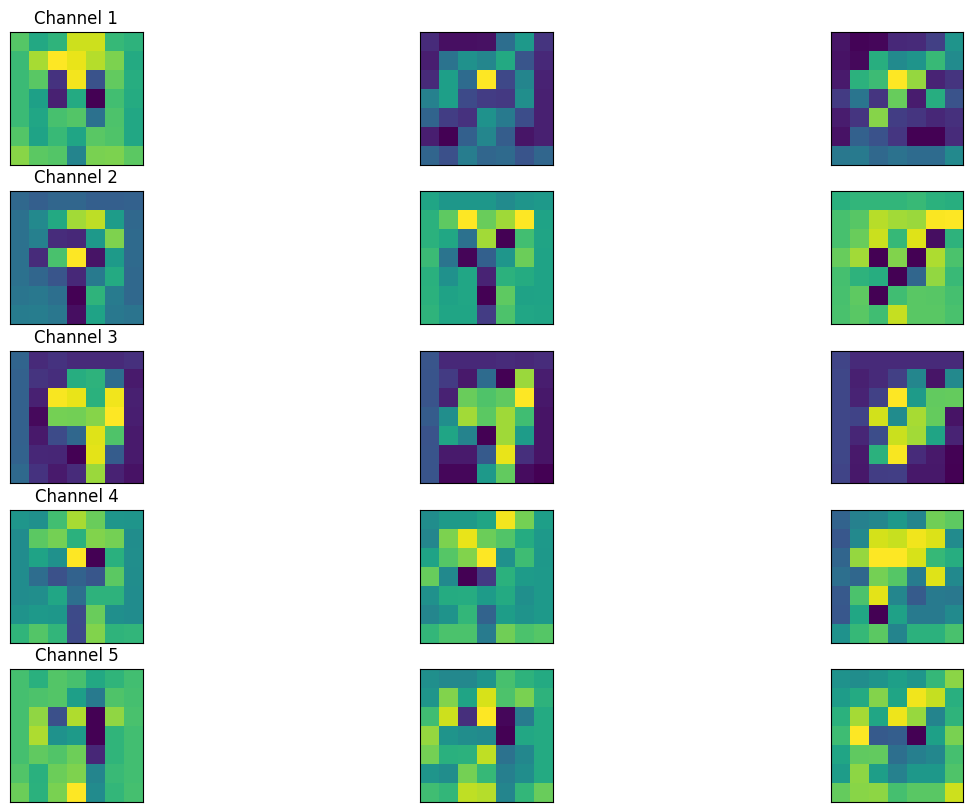

In [ ]:
#모델 학습
model = CNNAutoEncoder().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs=3
num_ch_to_show = 5

plt.figure(figsize=(15,10))

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.to(device)

        outputs, encoded_feat = model(inputs)

        loss = loss_fn(outputs, inputs)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    for c in range(num_ch_to_show):
        ax = plt.subplot(num_ch_to_show, epochs, ((epoch+1) + c * epochs))
        encoded_img_ch = encoded_feat[epoch, c ,:,:].detach().cpu().numpy()
        plt.imshow(encoded_img_ch, cmap='viridis')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if epoch == 0 and c >= 0:
            ax.set_title(f"Channel {c+1}")

    print(f"Epoch {epoch+1}/{epochs}, loss : {running_loss / len(trainloader):.4f}")

plt.show()



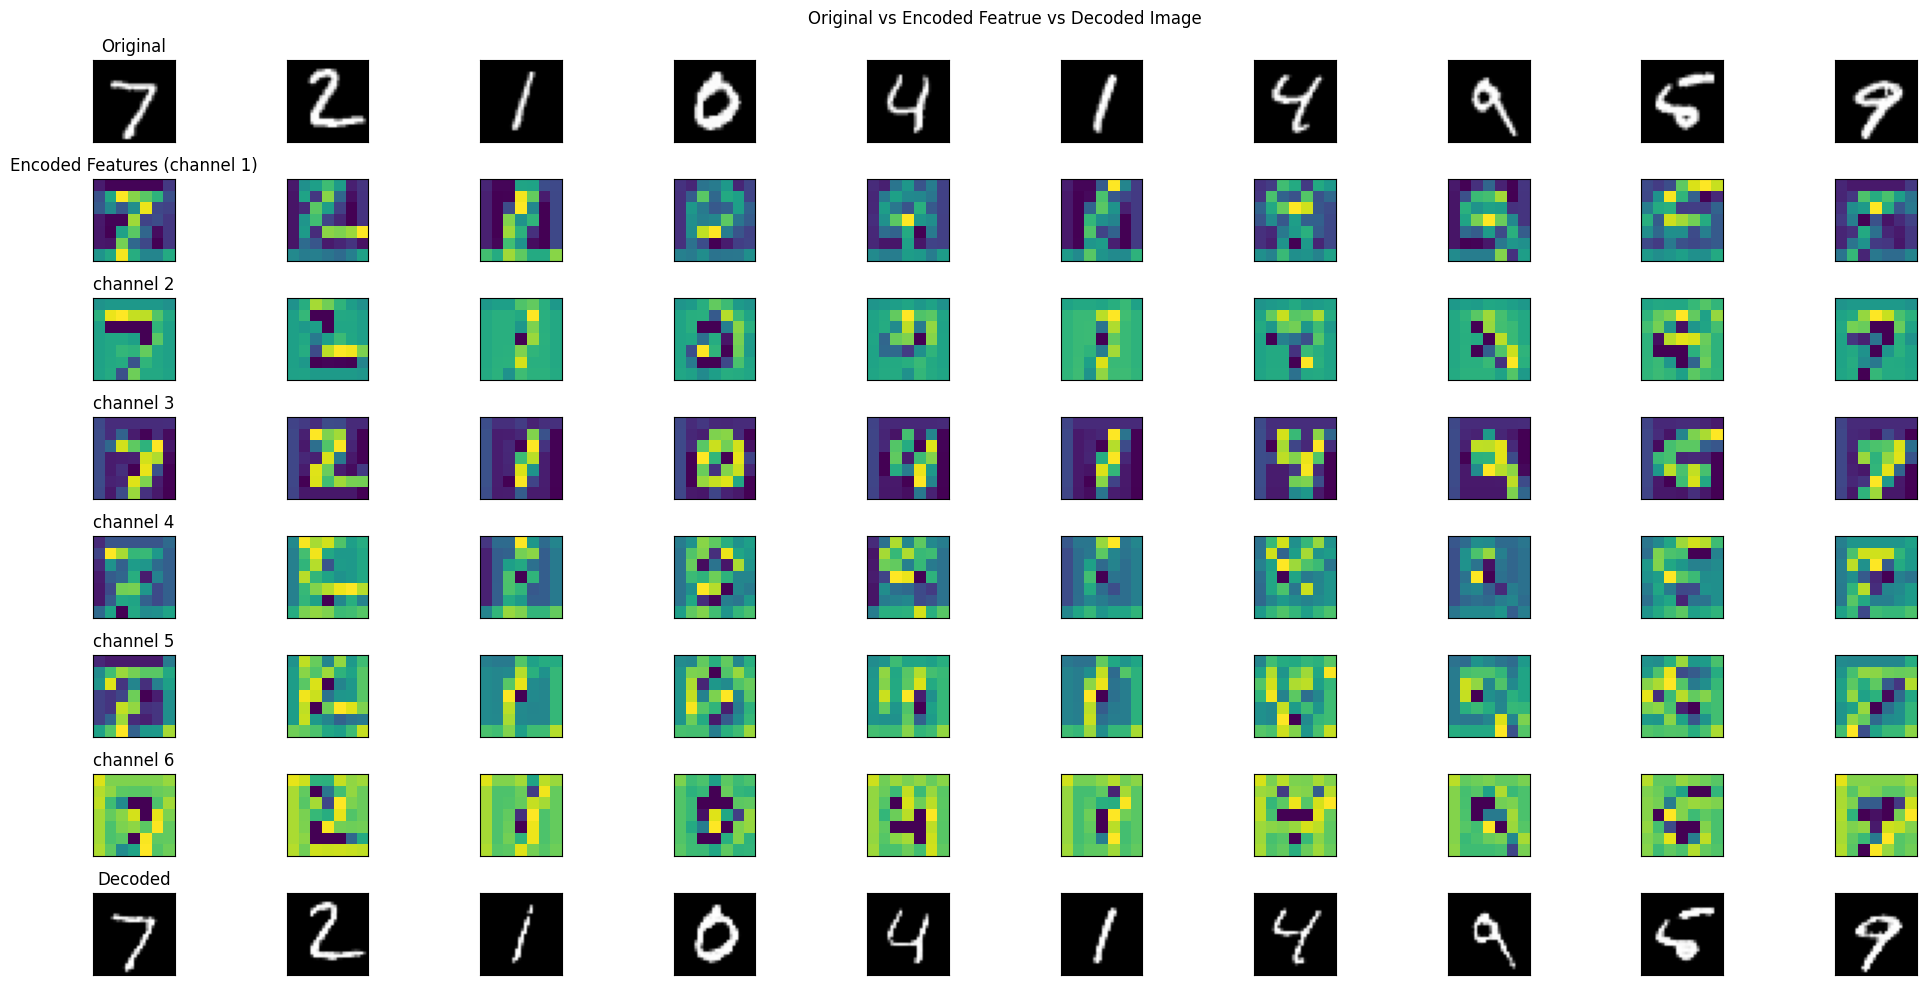

In [ ]:
model.eval()
with torch.no_grad():
    images, labels = next(iter(testloader))

    decoded_image, encoded_feat = model(images)

    n = 10
    num_ch_to_show = 6

    plt.figure(figsize=(20,10))
    for i in range(n):
        # Origin Image
        ax = plt.subplot(num_ch_to_show+2, n, i+1)
        img = images[i].cpu().numpy() * 0.5 + 0.5
        plt.imshow(np.transpose(img.squeeze(), (0,1)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title('Original')

        # Latent Feature
        for c in range(num_ch_to_show):
            ax = plt.subplot(num_ch_to_show+2, n, n+i +c*n +1)
            encoded_img_ch = encoded_feat[i, c , :,:].cpu().numpy()
            plt.imshow(encoded_img_ch, cmap='viridis')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            if i == 0 and c ==0:
                ax.set_title("Encoded Features (channel 1)")
            elif i == 0 and c>0:
                ax.set_title(f"channel {c+1}")

        # Decoded Image
        ax = plt.subplot(num_ch_to_show+2, n, (num_ch_to_show+1)*n +i+1)
        decoded_img = decoded_image[i].cpu().numpy().squeeze()
        plt.imshow(decoded_img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Decoded")

    plt.suptitle('Original vs Encoded Featrue vs Decoded Image')
    plt.tight_layout()
    plt.show()




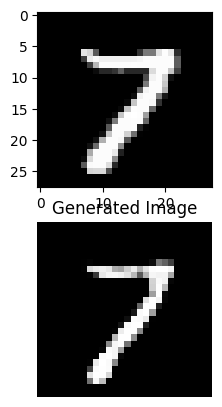

In [ ]:
import matplotlib.pyplot as plt
# Function to generate a new image from a random latent vector
def generate_image(model):
    smple_num = 34
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Create a random latent vector (matching the shape of the encoded features)
        # The shape of the encoded features is [batch_size, 32, 7, 7] based on the model definition.
        # For a single generated image, the batch size is 1.
        random_latent_vector = encoded_feat[smple_num].unsqueeze(0) + torch.ones(1, 32, 7, 7)
        # random_latent_vector = encoded_feat[smple_num].unsqueeze(0) * 0.7 +0.9

        # Pass the random latent vector through the decoder part of the model
        # We need to access the decoder directly.
        generated_image = model.decoder(random_latent_vector)

        # Unnormalize and convert to numpy for plotting
        # Since the decoder output has Sigmoid, it's already in [0, 1].
        generated_img_np = generated_image.squeeze().cpu().numpy()

        plt.figure(figsize=(5, 5))
        plt.subplot(2,1,1)
        plt.imshow(images[smple_num].squeeze(), cmap='gray')
        plt.subplot(2,1,2)
        plt.imshow(generated_img_np, cmap='gray')
        plt.title("Generated Image")
        plt.axis('off')
        plt.show()

# Generate a new image using the trained model
generate_image(model)